# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

Uma empresa de empréstimo de automóveis está passando por uma situação muito complicada. Ela está com uma alta demanda para uma frota reduzida e uma alta taxa de clientes inadimplentes, ou seja, clientes que não pagam o empréstimo no tempo devido.

- Alta demanda
- Frota reduzida
- Inadimplência

Isso está gerando um grande prejuízo para a empresa. E nós fomos contratados para ajudar a melhorar essa situação da empresa, para identificar esses clientes inadimplentes antes mesmo da empresa conceder o empréstimo do veículo.

Para resolver essa situação, essa empresa nos forneceu uma base de dados em formato CSV com dados históricos de clientes inadimplentes. Vamos utilizar essa base de dados para construir um modelo de inteligência artificial que vai conseguir classificar os clientes entre adimplentes e inadimplentes.

Para começar o projeto, vamos utilizar o Google Colab, que já possui todas as ferramentas necessárias para a construção do nosso projeto.

Vamos abrir aqui o Google Colab e o primeiro passo é fazer o upload da base de dados.

Vamos clicar no menu lateral esquerdo de arquivos e selecionar a opção "Fazer upload para o armazenamento da sessão".

Será aberto o explorador de arquivos do computador e vamos selecionar o arquivo emp_automovel.csv.

O arquivo emp_automovel.csv será disponibilizado na atividade "Preparando o ambiente". Antes de começar, volte até a atividade e baixe esse arquivo.

Com o upload do arquivo para o Google Colab feito, podemos importar a biblioteca pandas, que será utilizada para fazer a leitura desse arquivo. Mas antes, vamos copiar o caminho do arquivo no menu lateral. Clique com o botão direito no arquivo emp_automovel.csv e selecione a opção "Copiar caminho". Feito isso, podemos fechar o menu de arquivos e importar a biblioteca pandas, que já vem instalada no Google Colab.

Na primeira célula, vamos escrever import pandas as pd e vamos executar esse código com "Ctrl + Enter".

In [65]:
import pandas as pd

Então, com o código já executado e a biblioteca importada, vamos fazer a leitura da base de dados. Na próxima célula, vamos escrever dados = pd.read_csv(), que é a função que será utilizada para fazer a leitura do arquivo em formato CSV. Dentro dos parênteses, vamos passar uma string vazia e apertar o atalho "Ctrl + V", que vai colar o caminho do arquivo que foi copiado no menu de arquivos. Agora, podemos executar esta célula para fazer a leitura da base de dados.

In [66]:
dados = pd.read_csv('https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/dados/emp_automovel.csv')

In [67]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


Na próxima célula, vamos explorar esses dados para identificar quais tipos de informação temos nesse arquivo. Então, escrevemos dados na próxima célula e executamos o código.

Depois de executar o código, obtemos uma tabela com diversas informações a respeito dos clientes. Essas informações são históricas, ou seja, informações passadas a respeito desses clientes.

Temos as colunas de receita do cliente, anuidade do empréstimo, os anos de casa proprietário e assim por diante. A última coluna dessa base de dados é a coluna "inadimplente" que informa se o cliente pagou o empréstimo ou não.

O valor 0 indica que o cliente pagou o empréstimo no tempo devido. E o valor 1 significa que o cliente é inadimplente, ou seja, não pagou o empréstimo do veículo.

Todas as informações que temos a respeito desses clientes estão em formato numérico. Isso é muito importante para os algoritmos de inteligência artificial porque eles só conseguem compreender informações numéricas. Além disso, essa base de dados já veio totalmente tratada, então não precisaremos fazer nenhum tratamento nessa base de dados.

Tudo que precisamos fazer aqui é executar um algoritmo que selecionaremos, que será o de árvore de decisão.

Mas antes de fazermos isso, vamos separar as variáveis, as colunas das variáveis explicativas, ou seja, são as informações que explicam o padrão dos dados, e a variável "inadimplente". Então, vamos colocar essa variável separada das demais, que é a variável alvo. É a classe que estamos querendo identificar, que nós queremos classificar com nosso algoritmo de inteligência artificial.

Na próxima célula, primeiramente faremos essa divisão das variáveis explicativas e da variável alvo. Vamos chamar as variáveis explicativas de "X", escreveremos:

As variáveis explicativas serão todas as colunas da base de dados, com exceção da coluna "inadimplente". Assim, vamos utilizar o método drop() para remover essa coluna "inadimplente".

Então, como parâmetro da função 'drop', vamos passar 'Inadimplente', entre aspas. Além disso, como segundo parâmetro, axis = 1, para identificar que essa remoção está ocorrendo nas colunas da base de dados.

Na mesma célula, vamos separar também a variável alvo, que chamaremos de "Y". Então, escreveremos Y = dados[‘inadimplente’]. Estamos selecionando justamente a coluna 'Inadimplente'. Agora podemos executar essa célula com "Ctrl + Enter". Desta forma, os dados serão divididos, separados entre variável alvo e variáveis explicativas.

In [68]:
x = dados.drop('inadimplente', axis = 1)
y = dados ['inadimplente']

### Árvore de decisão

Agora, iremos utilizar o algoritmo de Árvores de Decisão, que toma decisões baseadas no padrão dos dados para classificar os clientes entre adimplente e inadimplente.

Para isso, primeiramente, é necessário fazer a importação do método, da função capaz de executar esse algoritmo. Esse algoritmo está disponibilizado na biblioteca scikit-learn, que já vem instalada no Google Colab.

Na próxima célula, escreveremos from sklearn.tree import DecisionTreeClassifier. A palavra "tree" refere-se ao módulo dos algoritmos baseados em árvore, que é a árvore de decisão que usaremos. Aqui as letras "D", "T" e "C" estão em caixa alta, e "Classifier" aqui indica que é um algoritmo do tipo classificação.

Estamos usando um algoritmo deste tipo porque estamos classificando nossos dados entre duas categorias, a categoria 0 e a categoria 1, que representam os adimplentes e os inadimplentes.



In [69]:
from sklearn.tree import DecisionTreeClassifier

Ao executar essa célula, já importamos o algoritmo. Agora, vamos ajustar esse algoritmo em um modelo.

Vamos ajustar o modelo a esses dados de x e y que temos aqui.

Na próxima célula, escreveremos modelo e vamos inicializar esse modelo. Vamos armazenar em uma variável, escrevendo modelo = DecisionTreeClassifier().

Na mesma célula, vamos finalizar o ajuste usando esse algoritmo para moldar nossos dados. Para isso, usaremos o método fit() a partir do modelo. Então, escreveremos modelo.fit(x, y). A partir da aplicação do método fit(), a variável modelo vai armazenar o padrão daqueles dados e vai conseguir classificar dados novos.

Posteriormente, conseguiremos avaliar quão bem esse modelo está apresentando resultados em fazer essa classificação.

Podemos utilizar o método score() para fazer essa avaliação. Portanto, na mesma célula, escreveremos modelo.score(x, y). A partir das variáveis explicativas armazenadas em x, o modelo fará a classificação desses dados da variável x, obterá o resultado da classificação e comparará o resultado com os dados armazenados na variável y.

A partir dessas comparações, obtemos uma taxa de acerto. Vamos agora executar essa célula, para identificar o quão preciso foi o nosso modelo.

In [70]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

Obtivemos um resultado de 1.0. Esse "1.0" representa uma métrica conhecida como acurácia, que é a taxa de acerto geral do modelo. Essa métrica é a resultante da comparação da classificação feita com base nas variáveis explicativas, comparando o resultado com os dados reais armazenados na variável y. Fazendo essa comparação, obtivemos um resultado de 1.0, que em porcentagem é 100%. Isso significa que o nosso modelo não cometeu erros de classificação.

Para documentarmos esse resultado, vamos inserir na próxima célula um print com essa informação. Portanto, escreva:

In [71]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


Ao executar essa célula, obtemos a informação de acurácia de 1.0. Isso significa que esse modelo não está errando em nenhum momento na classificação dos dados. Seria excelente, pois queremos um modelo que classifique de forma correta os dados de clientes inadimplentes e adimplentes.

Porém, veremos no próximo vídeo que este resultado é enganoso. Estamos utilizando a acurácia somente na avaliação dos dados de treinamento, isto é, os dados que foram usados para ensinar o modelo a identificar os padrões.

Os dados usados para avaliar o desempenho do modelo deveriam ser diferentes dos dados usados para treinamento. Se isso não ocorrer, pode-se cometer um erro em avaliar se o modelo está realmente entendendo o padrão dos dados ou se está apenas memorizando o resultado. No próximo vídeo, explicaremos como fazer essa separação corretamente.

## Validando o modelo

Com o objetivo de identificar clientes inadimplentes para uma empresa de empréstimos de automóveis, criamos um modelo de classificação utilizando os dados fornecidos por essa empresa. Obtivemos um resultado de acerto, conhecido como acurácia, de 100%, indicando que o modelo está acertando todas as classificações que realizou.

No entanto, a validação do nosso modelo foi feita de forma pouco efetiva. Utilizamos os mesmos dados usados para o treinamento do modelo para fazer a avaliação.

Isso equivale a entregar uma prova com gabarito para uma pessoa resolver, nessa prova, com o gabarito a pessoa já terá as respostas de todas as perguntas. Dessa forma, se quisermos que essa pessoa entenda o conteúdo da prova, ela poderia simplesmente memorizar o resultado com o gabarito e aplicar numa nova prova. E é exatamente isso que estamos fazendo. Estamos dando a essa pessoa a mesma prova novamente, com as mesmas questões e, consequentemente, com as mesmas respostas.

Portanto, é natural que essa pessoa acerte tudo, não porque ela entendeu a matéria, de fato, mas porque memorizou o resultado. Isso não significa que o modelo que construímos memorizou o resultado. Ainda não sabemos se isso aconteceu. No entanto, como aplicamos a mesma prova, ou seja, utilizamos os mesmos dados, não sabemos se é isso que está de fato ocorrendo.

Então, precisamos fazer uma validação de forma mais coerente. Precisamos passar novos dados para o modelo fazer a classificação. E nesses dados, já conheceremos a resposta, e poderemos comparar a resposta que o modelo deu para esses dados com as respostas reais e verificar se, de fato, está acertando. Dessa maneira, entenderemos se o modelo está aprendendo, ou seja, se está generalizando para novos dados ou não.

Para realizar essa tarefa de validação, podemos dividir nossos dados em duas partes: uma parte de treinamento e uma parte de validação. Ainda podemos utilizar outra estratégia, em vez de dividir nossos dados em apenas duas partes, vamos dividi-los em três: treinamento, validação e teste.

Qual a diferença de utilizar essas duas estratégias?

Na primeira, onde temos apenas treino e teste, vamos treinar o modelo na base de dados de treinamento e avaliar na base de dados de teste, que são dados que não foram usados no treinamento, sendo assim, verificaremos se o modelo está fazendo a generalização.

Na segunda estratégia, que separa entre treino, validação e teste, deixamos uma parte de teste separada durante todo o projeto e fazemos a validação do modelo no conjunto de dados de validação.

Assim, treinamos o modelo, fazemos a validação daquele modelo num conjunto de validação e deixamos separado um conjunto de teste até o final do projeto.

Por que fazer isso?

Ao longo do projeto, comparamos diversos modelos e aprimoramos o nosso modelo conforme os dados de validação. No entanto, para não carregar um viés para esse modelo, ou seja, estamos sempre melhorando aquele modelo com base em determinados dados. E se formos avaliar o modelo numa base de dados do mundo real, não saberemos como será o comportamento dele, porque sempre utilizamos um determinado padrão de dados para melhorá-lo.

Portanto, quando fazemos a separação de dados de teste, conseguimos, na escolha do melhor modelo durante o projeto, realizar essa última checagem para ver o desempenho do modelo em dados do mundo real, que ele nunca viu no processo de melhoria do modelo.

Desta forma, é isso que faremos.

Vamos dividir nossos dados em três partes: treinamento, validação e teste.

Para isso, utilizaremos uma função da biblioteca scikit-learn chamada train_test_split.

Porém, esta função permite somente a separação dos dados em treino e teste. Então, primeiramente faremos uma divisão que inclui treino e validação juntos, e teste separado. Em seguida, iremos subdividir os dados de treino e validação em duas partes.

Primeiramente, precisamos importar a função train_test_split. Então, escreva:

In [72]:
from sklearn.model_selection import train_test_split

Depois de importada a função, podemos fazer a primeira separação. Vamos fazer a separação de treino e validação em um mesmo conjunto de dados, que será chamado de x. Esse conjunto substituirá o valor x existente. A outra parte será os dados de teste.

Portanto, vamos criar variáveis chamadas de x_test e y_test, que vão armazenar esses dados. Para separá-los, podemos escrever o seguinte:

In [73]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

Neste fragmento de código, passamos para a função train_test_split a base de dados com os valores de x, que são as variáveis explicativas, e a variável alvo y. Definimos também que 15% dos nossos dados (ou seja, test_size = 0.15) serão usados para teste.

Além disso, usamos o parâmetro stratify para estratificar os nossos dados. Isso significa que manteremos as proporções de pessoas inadimplentes e adimplentes nesses dois conjuntos de dados.

Assim, mantemos a mesma proporção para que tanto nos dados de teste quanto nos dados de treino estejam representadas as mesmas proporções de dados.

Por fim, definimos o parâmetro random_state como 5. Isso porque a divisão feita por train_test_split é realizada de forma aleatória. Com random_state = 5, mesmo sendo uma escolha aleatória, você obterá o mesmo resultado obtido aqui.

Agora, podemos fazer a subdivisão dos dados de treino e validação. Vamos utilizar a mesma função train_test_split, mas desta vez iremos usar os dados armazenados em x e y. Lembrando que esses não são os mesmos dados iniciais, pois substituímos o dado x e y por essas novas variáveis, ou seja, somente essa parte de treino e validação está sendo separada aqui agora entre treino e validação.

In [74]:
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos abrir essa célula e passar o parâmetro stratify igual a y e o random_state igual a 5, isso para manter a proporção dos dados e garantir que o resultado que estamos construindo aqui seja o mesmo que você obterá nas vezes em que executar esse código.

In [75]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos executar essa célula e fazer a divisão dos dados.

Feita a divisão dos dados, vamos criar novamente o modelo. Desta vez, nós não avaliaremos o modelo nos mesmos dados que usamos para o treinamento. Vamos treinar e ajustar nosso modelo com os dados de treino e avaliar o resultado nos dados de validação. Os dados de teste (as variáveis x_test e y_teste) ficarão separados e não serão utilizados agora, guardaremos para um momento posterior do curso.

Vamos iniciar nosso modelo escrevendo: modelo = DecisionTreeClassifier. Em seguida, ajustaremos nosso modelo escrevendo: modelo.fit, passando como parâmetros x_treino e y_treino. Dessa maneira, o modelo será ajustado, compreendendo o padrão dos dados apenas com base na sessão de treinamento.

In [76]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

Agora, utilizaremos a acurácia. Faremos duas acurácias diferentes, uma para o treinamento e outra para o teste, para conseguirmos comparar como o modelo performa utilizando os mesmos dados de treinamento e como se sai para dados novos.

In [77]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8518138962902234


Executando essa célula, obtivemos um resultado de acurácia de treino de 1.0 e um de validação de 0.84. Nos dados de treinamento, nosso modelo não errou.

Porém, nos dados de validação, que são dados novos, ele obteve uma taxa de acerto de 84%. Isso indica que ele perdeu bastante desempenho ao tentar classificar dados que ele não viu durante o treinamento.

Aconteceu algo muito ruim. A performance desse modelo caiu drasticamente. Ele teve uma performance de 100% nos dados de treinamento, ou seja, não errou, mas nos dados de validação que ele nunca viu, ele teve uma performance de 84%.

O que pode estar acontecendo? Nosso modelo pode estar compreendendo muito bem os dados de treino ou pode estar decorando aquele padrão e tentando replicar o mesmo padrão para os dados de teste.

### Parâmetro max_depth

Para resolver essa situação, podemos passar um parâmetro para esse algoritmo de árvore de decisão, que será o parâmetro max_depth. Este parâmetro controla a profundidade máxima da árvore de decisão. Sem a passagem de nenhum parâmetro, o algoritmo tentará capturar todos os traços dos dados que foram utilizados no treinamento para fazer a classificação, levando a um sobreajuste desses dados.

Ele vai entender completamente como os dados funcionam e tentará aplicar isso em dados que nunca viu.

Vamos copiar esse código, colar na célula abaixo e modificar esse parâmetro da árvore de decisão para max_depth igual a 10. Assim, estabeleceremos uma profundidade máxima de 10.

In [78]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9223201475712236
Acurácia de validação: 0.9069481451117032


Agora, obtivemos um resultado de acurácia de treino de 0.92. Ou seja, agora, o nosso modelo está errando mesmo para os dados de treinamento. Efetivamente, eu passei os mesmos dados para ele e ele não está tendo um acerto de 100%. Ele está acertando em 92%.

Entretanto, veja que interessante, nos dados de validação, ele obteve uma acurácia de 0.90. Não foi a mesma dos dados de treinamento, mas melhorou em relação ao modelo anterior que era de 0.84. Isso indica que agora o nosso modelo está conseguindo entender melhor o padrão que existe nos dados e não apenas memorizando o resultado.

### Conclusão

Mas, até agora, avaliamos o nosso modelo utilizando apenas a acurácia, que reflete uma taxa de acerto geral do nosso modelo, isto é, se ele está acertando ou não de uma forma geral.

Como podemos saber se o nosso modelo está acertando bem apenas para as pessoas inadimplentes ou apenas para as pessoas adimplentes? A acurácia não nos fornece essa informação e é exatamente isso que vamos explorar no próximo vídeo.

Vamos ver uma maneira de avaliar o nosso modelo de forma mais específica para cada uma das classes.

## Para saber mais: método holdout

No momento de validar modelos de classificação, precisamos checar se o modelo está de fato generalizando, ou seja, se está compreendendo o padrão dos dados e classificando corretamente dados novos. A estratégia mais simples para avaliar essa generalização, conhecida como holdout, consiste em dividir os dados em duas partes: um conjunto de dados de treinamento e outro de teste. O conjunto de treinamento é utilizado para treinar o modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos anteriormente.

Com o auxílio da imagem abaixo, analise a exemplificação do método holdout em funcionamento:

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula1-img1.png' alt='diagrama indicando a divisão de dados em duas partes: uma de treinamento e outra de teste, com uma seta direcionada de “Dados” para “Treino”. A imagem oferece insight sobre como os conjuntos de treinamento e teste são empregados no método holdout.'/>

Em alguns casos, especialmente quando se realiza ajustes finos nos parâmetros do modelo, é útil ter um conjunto de validação adicional. Nesse caso, a divisão é feita em três partes: conjunto de treino, conjunto de validação e conjunto de teste. O conjunto de validação é usado na comparação de diferentes modelos, na seleção do modelo mais adequado e no ajuste dos hiperparâmetros. Enquanto isso, o conjunto de teste continua sendo utilizado para avaliar o desempenho final do modelo escolhido, após todo o processo de ajuste.

Por isso, quanto mais se utiliza os mesmos dados para tomar decisões sobre configurações de melhorias no modelo ou escolha de hiperparâmetros, mais comprometida se torna a confiabilidade desses resultados ao serem generalizados para dados novos e não vistos. Isso ocorre pois as melhorias são feitas a partir desses dados de validação.

É possível perceber que as melhorias aplicadas desempenham um papel fundamental para resolver o problema. Entretanto, para assegurar que o desempenho do modelo permaneça consistente em relação aos dados do mundo real, que não foram vistos no treinamento ou no aprimoramento dos modelos, a estratégia da divisão entre 3 conjuntos de dados, como se pode analisar na imagem a seguir, oferece um bom direcionamento final, já que indica se o modelo escolhido está viesado ou não em relação aos dados de validação.

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula1-img2.png' alt='diagrama indicando a divisão de dados em três partes: treinamento, validação e teste. Uma seta é direcionada de “Dados” para “Treino”, que conecta-se a “Validação”, que está em destaque.'/>


## Avaliando o modelo

Até o momento, criamos um modelo inicial para classificar clientes inadimplentes de uma empresa de empréstimo de automóveis e obtivemos uma acurácia de validação de cerca de 90%.

No entanto, essa porcentagem de acertos não nos informa quantos clientes estão sendo identificados corretamente como inadimplentes. Afinal, o foco do projeto é identificar corretamente essas pessoas para evitar prejuízos para a empresa. Para fazer uma avaliação mais específica e estimar a quantidade de clientes que estão sendo corretamente identificados como inadimplentes, precisaremos utilizar um método diferente da acurácia, a matriz de confusão.

A matriz de confusão nos informa a quantidade de acertos e erros para cada uma das categorias da variável alvo, ou seja, a quantidade de clientes que o modelo classificou como adimplentes e a quantidade de clientes que o modelo identificou como inadimplentes.

Começaremos importando a função necessária para construir essa matriz de confusão. Na primeira célula, escreva:

In [79]:
from sklearn.metrics import confusion_matrix

Executaremos essa célula e, em seguida, vamos construir a matriz de confusão.

A matriz de confusão compara o resultado de classificação do modelo com o resultado real. Primeiro, vamos armazenar as previsões do modelo utilizando o método predict() que, a partir das variáveis explicativas, determina qual é a classificação. Na primeira célula, armazene as previsões com y_previsto e depois compare essas previsões com o resultado real. Escreva:

In [80]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[8819   87]
 [ 821   31]]


Ao executar o código, o resultado será uma matriz de números, mas ela não está muito explicativa com apenas quatro valores. Para uma melhor visualização e entendimento, vamos utilizar uma função que melhore o aspecto visual e identifique o que cada linha e coluna representam.

A biblioteca Scikit-learn possui uma função para melhorar a visualização da matriz de confusão. Na próxima célula, importe essa função escrevendo:

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

Vamos executar essa célula. Agora, vamos construir essa visualização utilizando a matriz de confusão que já foi construída anteriormente.

O parâmetro confusion_matrix é onde armazenamos anteriormente a matriz de confusão.

Na mesma célula, escreveremos visualização.plot(), finalizando com um ponto e vírgula. Esse ponto e vírgula evita a exibição de uma informação textual que surge acima da visualização de dados. Utilizaremos essa funcionalidade em várias ocasiões ao fazer uso das visualizações da biblioteca matplotlib.

Escreva na próxima célula:

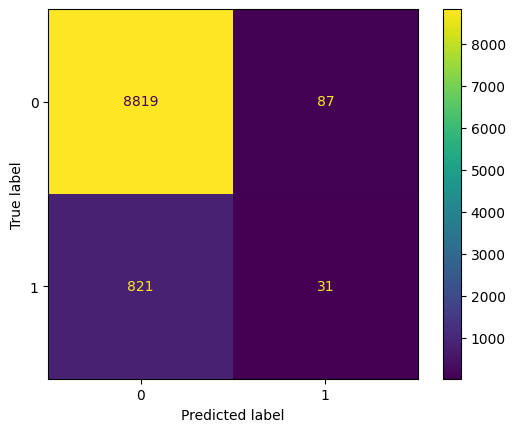

In [82]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

As linhas trazem a informação "true label", que indica os valores reais da nossa base de dados, ou seja, são os valores y_val. Nas colunas, encontramos a informação "predict label", que representa a quantidade de valores previstos pelo modelo. Nesse sentido, o modelo utilizou as variáveis explicativas para realizar uma classificação, identificando a classe com base no conhecimento do modelo, e armazenou as informações na matriz de confusão, nas colunas.

Além disso, encontramos o valor 0 na primeira linha e o valor 1 na segunda coluna. O valor 0 indica os clientes adimplentes, isto é, os que pagam em dia. Já o valor 1 representa os clientes inadimplentes, que não estão quitando o empréstimo.

Esses são os valores reais, correspondendo à quantidade de pessoas realmente adimplentes ou inadimplentes.

Nas colunas, temos a quantidade, na primeira coluna, de clientes adimplentes baseados na classificação do modelo. Assim, se somarmos essa primeira coluna, obteremos a quantidade de classificações pelo modelo que foram identificadas como adimplentes. Na segunda coluna, encontramos a quantidade de clientes inadimplentes identificados pelo modelo. Ao cruzar esses resultados, poderemos verificar quantos acertos e erros o modelo obteve.

Para melhorar a visualização, alteraremos o nome do 0 e do 1 para "adimplente" e "inadimplente", respectivamente, facilitando a identificação de acertos e erros.

Para isso, copiaremos o código dessa célula, colaremos na célula abaixo e adicionaremos um parâmetro adicional no Confusion Matrix Display. Logo após confusion_matrix, incluiremos display_labels = ['Adimplente', 'Inadimplente']. Execute essa célula para ver o resultado.

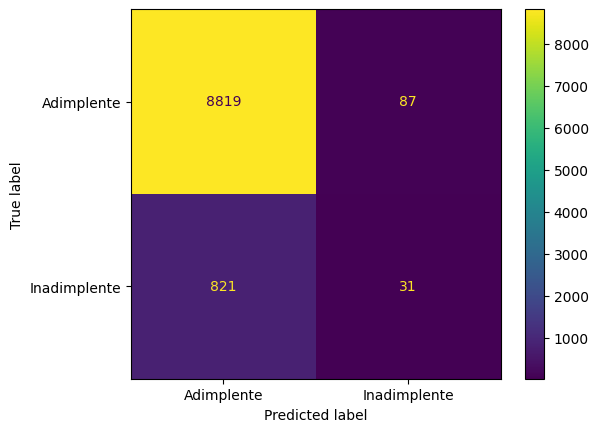

In [83]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

Agora, está mais fácil identificar os valores dessa matriz de confusão. Consegue-se perceber, por exemplo, que o primeiro valor onde está escrito "1e+04" indica uma notação científica. Então esse valor é "10^4", que seria 10.000. Dessa forma, temos 10.000 clientes que são adimplentes, de acordo com a linha de valores reais, e que o modelo também classificou como adimplentes. O modelo acertou nesses 10.000 clientes.

Já o valor de 958, que está na segunda linha e na primeira coluna, representa as pessoas verdadeiramente inadimplentes que foram classificadas como adimplentes pelo modelo. Ou seja, o modelo errou ao classificá-las como adimplentes, isto é, que elas pagariam o empréstimo, quando, na realidade, não pagariam.

Algo semelhante ocorre com o valor 121, no canto superior direito. Esse é o número de clientes que o modelo classificou como inadimplentes, mas que eram adimplentes. Eles pagariam, mas o modelo sugeriu que eles não pagariam. Portanto, o modelo errou novamente, porém de maneira diferente.

Por fim, temos o valor "44", no canto inferior direito. Esse valor corresponde aos clientes que são realmente inadimplentes e que o modelo também classificou como inadimplentes. Portanto, o modelo acertou nesse caso.

Podemos ver que nosso modelo não está apresentando resultados tão bons quanto esperávamos. Embora a acurácia tenha obtido uma taxa de acerto de 90%, ao identificarmos os clientes inadimplentes, notamos que ele identificou apenas 44 deles.

Se somássemos o número real de pessoas inadimplentes, teríamos mais de mil. Portanto, nosso modelo não está sendo capaz de resolver o problema que pretendemos solucionar, que é identificar corretamente as pessoas inadimplentes que não estão pagando o empréstimo do veículo.

A matriz de confusão se provou muito útil para identificarmos que a acurácia não é uma métrica que sempre precisamos utilizar. Ela não é a mais importante, pois não vai nos ajudar a entender todas as nuances do nosso modelo. Além disso, a matriz de confusão também foi importante para identificar que o modelo não está classificando bem as pessoas inadimplentes.

A pergunta que fica é: será que conseguimos extrair métricas a partir dos valores na matriz de confusão, assim como fizemos com a acurácia, que possam nos ajudar melhor com o nosso problema? Vamos explorar isso em nossa próxima aula.

### Para saber mais: entendendo a matriz de confusão

Para obter uma avaliação mais completa do desempenho de modelos de classificação, podemos utilizar uma ferramenta conhecida como matriz de confusão. Essa matriz oferece vantagens à pessoa cientista de dados, pelo fato de permitir entender qual a quantidade de erros e acertos das previsões de um modelo. Ao invés de uma taxa de acerto geral, a matriz é capaz de fornecer informações em uma visualização para cada uma das categorias da variável alvo.

Pense em um sistema de segurança de um prédio que utiliza câmeras para identificar pessoas entrando. A "matriz de confusão" se torna valiosa, pois possibilita verificar quantas vezes o sistema acertou ao identificar corretamente as pessoas autorizadas, quantas vezes acusou erroneamente pessoas e quantas vezes deixou passar pessoas não autorizadas. Com esses números, é possível ajustar o sistema para minimizar falsos positivos e negativos, melhorando sua precisão na detecção de visitantes.

Na representação geral de uma matriz de confusão, para mais detalhes analise a imagem a seguir, as linhas da matriz correspondem aos valores reais da base de dados, enquanto as colunas correspondem aos valores previstos pelo modelo de classificação. As categorias da variável alvo são representadas pelo valor 0 (ausência do atributo), também chamado de negativo, e pelo valor 1 (presença do atributo), também chamado de positivo.

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula1-img3.webp' alt='Imagem de uma matriz de duas linhas e duas colunas. As linhas representam os valores reais e as colunas representam os valores previstos. A primeira linha e primeira coluna, da esquerda para a direita, está em verde. São os “verdadeiros negativos”, onde o valor real e previsto é 0. A primeira linha e segunda coluna, em vermelho, são os “falsos positivos”, onde o valor real é 0 e valor previsto é 1. A segunda linha e primeira coluna, em vermelho, são os “falsos negativos”, onde o valor real é 1 e valor previsto é 0. A segunda linha e segunda coluna, em verde, são os “verdadeiros positivos”, onde o valor real é 1 e valor previsto é 1.' />

Cada elemento da matriz é identificado por um nome de acordo com o cruzamento entre a previsão e o valor real. A diagonal principal da matriz, que está destacada pela cor verde, representa os elementos que tem a previsão igual ao valor real, portanto são os acertos do modelo. Já a diagonal secundária, que está destacada pela cor vermelha, representa os elementos com previsões diferentes do valor real, portanto são os erros do modelo. A descrição de cada um dos elementos é a seguinte:

Verdadeiros Negativos (VN): Quando o valor real for 0 e a predição também for 0. Indica que o modelo classificou corretamente os valores da classe negativa.
Falsos Positivos (FP): Quando o valor real for 0 e a predição for 1. Indica que o modelo classificou erroneamente um elemento da classe negativa como se fosse da classe positiva.
Falsos Negativos (FN): Quando o valor real for 1 e a predição for 0. Indica que o modelo classificou erroneamente um elemento da classe positiva como se fosse da classe negativa.
Verdadeiros Positivos (VP): Quando o valor real for 1 e a predição também for 1. Indica que o modelo classificou corretamente os valores da classe positiva.
Esses valores são muito úteis para uma análise mais aprofundada do modelo de classificação. Isso permite identificar as capacidades e limitações da predição, se há um equilíbrio entre os acertos e erros ou se o resultado está tendencioso para uma classe em detrimento da outra. Com isso, é nítido que a matriz de confusão é uma ferramenta muito mais completa do que a métrica de acurácia, que representa apenas a porcentagem de acerto do modelo, sem considerar as classes de maneira isolada.

## <font color='dark'>Métricas de avaliação</h1>

Percebemos, a partir da matriz de confusão, que o modelo não está atingindo o desempenho esperado. Anteriormente, tínhamos alcançado uma taxa de acerto de aproximadamente 90%.

No entanto, ao analisar a matriz de confusão, notamos que o modelo não está sendo capaz de identificar os clientes inadimplentes de forma adequada, que é justamente o foco do projeto.

O modelo está detectando apenas 44 clientes inadimplentes, enquanto há mais de mil deles no conjunto de dados de validação.

### Acurácia, precisão e recall

Agora, vamos explorar algumas métricas, que são valores entre 0 e 1, a fim de mensurar o quão eficiente o modelo está sendo. Já estamos familiarizados com uma delas, que é a acurácia, mas podemos calcular outras métricas com base na matriz de confusão.

#### Matriz de confusão

Para extrair essas métricas, iremos analisar uma representação da matriz de confusão.

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula2-img1.webp' alt='inserir imagem 2 aqui'>

Matriz de confusão. Quadrado dividido em quatro quadrados menores, um em cada canto. Na superior e lateral esquerda, há o número 0, enquanto na parte inferior, o número é 1. No lado esquerdo, encontra-se o texto "Valores reais", representado pelas linhas. Na parte inferior do quadrado, os dois quadrados à esquerda têm o valor 0, e os dois quadrados à direita têm o valor 1. Abaixo desses quadrados, está o texto "Valores previstos", representado pelas colunas.

Nas linhas, temos os valores reais do conjunto de dados, enquanto nas colunas, temos os valores previstos pelo modelo.

Vamos identificar a classe 0 e a classe 1 da variável alvo, com o 0 representando a ausência de uma determinada característica, e o 1 representando a presença da característica.

No caso, que está relacionado à inadimplência, o 1 representa a presença de inadimplência (clientes inadimplentes) e o 0 representa a ausência dessa característica (pessoas adimplentes que pagam em dia).

0: adimplência
1: inadimplência

Além disso, cada um dos valores da matriz de confusão pode ser interpretado com uma nomenclatura, a partir desse cruzamento de valores.

Descrição da Matriz de confusão feita anteriormente. No canto superior esquerdo, encontra-se o texto "Verdadeiro Negativo (VN)". No canto superior direito, está o texto "Falso Positivo (FP)". No canto inferior esquerdo, encontra-se o texto "Falso Negativo (FN)", e no canto inferior direito, encontra-se o texto "Verdadeiro Positivo (VP)".

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula2-img2.webp' alt='inserir imagem 2 aqui'>

Por exemplo, o primeiro valor na primeira linha e primeira coluna corresponde aos "verdadeiros negativos", onde tanto os valores reais quanto os valores previstos pelo modelo indicam a ausência da característica.

Na primeira linha e segunda coluna, encontram-se os "falsos positivos", onde os valores reais indicam a ausência da característica, enquanto os valores previstos indicam a presença. Na segunda linha e primeira coluna, temos os "falsos negativos", em que os valores reais representam a presença da característica, e os valores previstos indicam a ausência.

Por fim, na segunda linha e segunda coluna, estão os "verdadeiros positivos", em que tanto os valores reais quanto os previstos pelo modelo indicam a presença da característica.



#### Extraindo a acurácia

Para extrair a acurácia, que é a métrica que já conhecemos da taxa de acerto geral. Vamos avaliar os acertos do modelo dividido por todas as previsões realizadas pelo modelo.

Portanto, somamos os verdadeiros negativos e verdadeiros positivos e dividimos pela soma de todas as previsões, ou seja, os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

Importando a biblioteca
No entanto, no nosso código, não calcularemos isso manualmente. Existe uma função da biblioteca scikit-learn que consegue realizar esse cálculo para nós. Em uma célula no Colab, importamos essa função para fazer o cálculo da acurácia:

In [84]:
from sklearn.metrics import accuracy_score

Com a função importada, vamos executar o cálculo da acurácia.

Neste código, passamos os valores reais (y_val) e os valores previstos (y_previsto) para a função accuracy_score comparar e obter o resultado de acurácia. Sendo o y_previsto o resultado que obtivemos para construir a matriz de confusão.

Na próxima célula, escrevemos:

In [85]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9069481451117032


Executando esse código, obteremos 0.90, que é justamente a acurácia que já tínhamos obtido no resultado anterior.

Agora, vamos explorar outras métricas que são extraídas da matriz de confusão.

Percebemos que a acurácia não é uma métrica muito adequada para o nosso problema, pois identificamos que nosso modelo não está identificando bem as pessoas em situação de inadimplência.

Portanto, as métricas que vamos explorar agora serão especificamente aquelas voltadas para abordar esses "verdadeiros positivos", que são o valor mais importante para o nosso problema.

#### Métricas de Precisão e Recall

A primeira métrica que podemos extrair é a precisão, que considera somente os valores previstos pelo modelo que representam a presença da característica.

Portanto, vamos avaliar a segunda coluna da nossa matriz. Para calcular a precisão, pegamos os verdadeiros positivos e dividimos pela soma da segunda coluna, que são os falsos positivos e verdadeiros positivos.

Dessa maneira, obtemos a precisão, que é um valor entre 0 e 1. Quanto mais próximo de 1, melhor será o resultado dessa métrica.

A outra métrica que vamos extrair será o recall (revocação), que considera apenas os valores reais em que a característica está presente.

Desta forma, iremos avaliar exclusivamente a segunda linha da matriz de confusão. Para calcular o recall, pegamos os verdadeiros positivos e dividimos pela soma da segunda linha, que consistirá nos falsos negativos mais os verdadeiros positivos.

Não vamos calcular essas métricas manualmente. Importaremos duas funções capazes de executar esses cálculos. Assim, no nosso código, faremos primeiro a importação das funções para realizar esses cálculos.

Na próxima célula, importamos a função precision_score para realizar o cálculo da precisão e a função recall_score para a realização do cálculo do recall.

In [86]:
from sklearn.metrics import precision_score, recall_score

Em seguida, calculamos cada uma delas e imprimimos os resultados. Passamos os valores reais e previstos pelo modelo para fazer essa comparação e realizar o cálculo:

In [87]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.2627118644067797
Recall: 0.036384976525821594


Ao executar esses comandos, notamos que a precisão do nosso modelo é de 0.26 e o recall é de 0.04. Esses valores estão muito próximos de zero. Portanto, temos um indicativo de que o nosso modelo não está performando bem. Encontramos uma precisão de 0.26 e um recall de 0.04, indicando que a performance do nosso modelo está aquém do esperado.

Agora, podemos identificar qual é a métrica mais relevante para o nosso problema: será a precisão ou o recall? Para entender isso, precisamos questionar.

O que é mais prejudicial para a empresa: incorrer em prejuízo financeiro ou deixar de vender para um cliente? Muito provavelmente é incorrer em prejuízo financeiro.

Portanto, a métrica que avaliará se a empresa não vai incorrer em tanto prejuízo financeiro é a taxa de recall, já que ela avalia os valores reais de pessoas inadimplentes.

Quanto maior a quantidade de falsos negativos, mais clientes a empresa irá considerar como bons pagadores, sendo que, na verdade, esses clientes são inadimplentes. No caso da precisão, quanto melhor for seu valor, menos clientes serão perdidos.

Mas, no nosso caso, o mais prejudicial será ter um recall.

Com isso, entendemos que o recall será a métrica mais relevante para avaliar o desempenho do nosso modelo.

### Métrica F1 Score

Além disso, podemos extrair ainda outra métrica, conhecida como F1 Score (pontuação F1). Essa métrica representa um equilíbrio entre a precisão e o recall. É calculada como duas vezes a precisão vezes o recall, dividido pela soma entre precisão e recall.

Essa métrica é utilizada quando desejamos equilibrar a não perda de clientes com a inexistência de prejuízos. Isso se aplica ao nosso projeto específico, mas em outros projetos de classificação, o entendimento será diferente, sendo o F1 Score o equilíbrio entre essas duas métricas.

Importando a biblioteca scikit-learn
Para realizar esse cálculo, também existe uma função na biblioteca scikit-learn que podemos usar. Portanto, vamos fazer a importação da função agora. Na próxima célula, escrevemos from sklearn.metrics import f1_score e executamos a célula com "Ctrl + Enter".

In [88]:
from sklearn.metrics import f1_score

Na célula seguinte, vamos calcular o F1 Score. Novamente, passamos os valores reais (y_val) e os valores previstos pelo modelo (y_pred):

In [89]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.06391752577319587


O resultado obtido foi de 0,07 para o F1 Score, valor esse que é considerado baixo, justamente porque as nossas métricas de precisão e recall estão muito baixas.

### Conclusão

Agora que conseguimos extrair as principais métricas de classificação da matriz de confusão, vamos explorar outras métricas que se concentram especificamente no recall, ou seja, na métrica mais relevante para o nosso projeto.

Dessa forma, vamos explorar gráficos que utilizam o recall para a construção, permitindo-nos avaliar o desempenho do modelo de outra maneira.

### Para saber mais: quando usar cada métrica

Avaliar de forma adequada o desempenho de um modelo de machine learning é essencial para assegurar que o modelo está solucionando o problema de negócio que precisa ser resolvido. Existem diversas métricas que podem ser utilizadas para avaliar o desempenho dos modelos de classificação, cada uma delas possui vantagens e limitações. Essas métricas são calculadas a partir da comparação entre as classificações feitas pelo modelo e os valores reais da base de dados. Portanto, podem ser extraídas a partir de uma matriz de confusão. As principais métricas de classificação são:

Acurácia

É a métrica mais comum e básica em problemas de classificação. É utilizada para medir a proporção de dados previstos corretamente pelo modelo em relação ao total dos dados. Essa métrica é útil quando as classes da variável alvo estão balanceadas, ou seja, quando existe uma quantidade equilibrada de dados para cada classe e uma importância equivalente de classificação entre as categorias. Como exemplo de utilização, temos o reconhecimento de dígitos manuscritos. Podemos utilizar imagens de caracteres de letras e números para treinar um modelo de classificação para identificar corretamente a escrita. Como cada letra ou número não tem uma importância maior do que as demais, a acurácia se torna uma boa métrica para medir a capacidade do modelo em classificar corretamente os dígitos.

Abaixo, podemos analisar o cálculo da acurácia a partir da matriz de confusão. Ela é calculada somando os acertos do modelo (VN + VP) e dividindo por todos os acertos e erros (VP+VN+FP+FN).

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula2-img3.png' alt='Imagem com uma fórmula matemática no topo e uma representação da matriz de confusão logo abaixo. A fórmula é a acurácia igual a divisão de dois termos. O numerador é a soma de verdadeiros negativos e verdadeiros positivos. O denominador é a soma de verdadeiros negativos, falsos positivos, falsos negativos e verdadeiros positivos. A matriz de confusão possui 2 linhas e 2 colunas, com valores reais nas linhas e valores previstos nas colunas. No topo superior esquerdo, em verde, estão os verdadeiros negativos. No topo superior direito, em vermelho, estão os falsos positivos. No canto inferior direito estão os falsos negativos. No canto inferior direito estão os verdadeiros positivos.' />

Revocação (recall)

Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos. É usada quando o risco ou custo de classificar falsos negativos é alto. Por exemplo, em casos de diagnóstico de doenças graves, em que é fundamental detectar corretamente a presença da doença.

Abaixo podemos constatar o cálculo do recall a partir da matriz de confusão. O recall só leva em consideração os valores positivos reais, ou seja, os valores da segunda linha da matriz. Ele é calculado a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos reais (VP + FN):

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula2-img4.png' alt='Imagem com uma fórmula matemática no topo e uma representação da matriz de confusão logo abaixo. A fórmula é o recall igual a divisão de dois termos. O numerador contém os verdadeiros positivos. O denominador é a soma de falsos negativos e verdadeiros positivos. A matriz de confusão está com a segunda linha destacada, que representa os valores reais da classe 1. A linha em destaque possui os falsos negativos em vermelho e verdadeiros positivos em verde.' />

Precisão

Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos. É usada quando o risco ou custo de classificar falsos positivos é alto, por exemplo em casos de seleção de ações no mercado financeiro, onde o importante é selecionar ações que tenham grande probabilidade de retorno, abaixando a quantidade de ações ruins (falsos positivos) mesmo que outras boas ações não tenham sido detectadas pelo modelo (falso negativo). A precisão também é importante no exemplo de detecção de doenças, onde queremos evitar que pacientes saudáveis sejam erroneamente classificados como doentes.

Abaixo podemos analisar o cálculo da precisão a partir da matriz de confusão. A precisão só leva em consideração os valores positivos previstos pelo modelo, ou seja, os valores da segunda coluna da matriz. Ela é calculada a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos previstos (VP + FP):

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula2-img5.webp' alt='Imagem com uma fórmula matemática no topo e uma representação da matriz de confusão logo abaixo. A fórmula é a precisão igual a divisão de dois termos. O numerador contém os verdadeiros positivos. O denominador é a soma de falsos positivos e verdadeiros positivos. A matriz de confusão está com a segunda coluna destacada, que representa os valores previstos da classe 1. A coluna em destaque possui os falsos positivos em vermelho e verdadeiros positivos em verde.' />

F1-Score

Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe. Além disso, é aplicável quando o risco ou custo de falsos positivos e de falsos negativos é alto simultaneamente. Em casos de detecção de tumores em pacientes, é preciso ter um equilíbrio entre evitar erros na detecção de tumores quando a pessoa realmente os possui e evitar erros ao informar que uma pessoa possui um tumor quando na realidade ela não possui.

O cálculo do F1-Score é feito a partir da média harmônica entre a precisão e o recall. Portanto, equivale a 2 vezes a precisão pelo recall, dividido pela soma entre a precisão e o recall:

<img src='https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/assets/Aula2-img6.webp' alt='Fórmula matemática: F1 é igual a 2 vezes a uma fração de duas expressões. O numerador é a multiplicação entre precisão e recall. O denominador é a soma entre precisão e recall.' />

A escolha da métrica de classificação adequada depende do problema que está sendo resolvido e de cada cenário. Nos casos em que as classes estão balanceadas e possuem importância semelhante, a acurácia pode ser uma boa métrica inicial. Porém, quando as classes estão desequilibradas ou os erros têm custos diferentes, métricas como precisão, recall e f1-score são mais indicadas.

Caso deseje saber mais sobre as métricas de classificação, veja o Alura+ abaixo:

[Alura+: Métricas de avaliação para classificação](https://cursos.alura.com.br/extra/alura-mais/metricas-de-avaliacao-para-classificacao-c1440)

### Curva ROC

Identificamos que o recall é a métrica mais relevante para nosso problema, uma vez que ajuda a minimizar o prejuízo financeiro para a empresa.

Quanto melhor for o recall, menos pessoas que estão inadimplentes serão classificadas como adimplentes. Ou seja, menos pessoas que não pagariam serão identificadas como pagadoras e teriam o serviço oferecido a elas, gerando prejuízo.

Utilizamos o recall para obter mais métricas, especificamente gráficos construídos a partir de recall para entender a eficiência do nosso modelo.

O primeiro desses gráficos será a curva ROC, usada para avaliar se nosso modelo consegue fazer uma distinção eficaz entre as classes, isto é, entre pessoas clientes que estão em dia com seus pagamentos e pessoas clientes que estão inadimplentes.

Essa curva ROC é construída usando a métrica recall e outra métrica derivada da matriz de confusão. Se voltarmos um pouco ao nosso projeto, a outra métrica usada para a construção da curva ROC é a taxa de falsos positivos.

Ela é calculada pela quantidade de falsos positivos, dividido pela soma de verdadeiros negativos e falsos positivos. Assim, vamos usar esta métrica e recall para a construção desse gráfico e a avaliação do nosso modelo será feita a partir dessas duas métricas.

Não faremos isso manualmente, pois já existe uma função no scikit-learn que constrói essa curva automaticamente, requerendo apenas os valores reais e previstos como input. Contudo, será deixada uma atividade após este vídeo demonstrando como a curva ROC é construída, para facilitar o entendimento de como ela funciona.

Na primeira célula, vamos importar a função capaz de construir essa curva ROC:

In [90]:
from sklearn.metrics import RocCurveDisplay

Na próxima célula, vamos criar essa visualização. Escrevemos RocCurveDisplay.from_predictions() passando os valores y_val e y_previsto; e também, name = 'Árvore de Decisão'.

Neste código, o ROCCurveDisplay.from_predictions recebe os valores reais (yval), os valores previstos (y_previsto) e o nome do nosso modelo ('árvore de decisão').

O from_predictions() é porque essa função pode ser construída de várias formas, mas iremos construir o gráfico a partir das previsões feitas pelo modelo. Portanto, vamos comparar os resultados reais dos previstos.

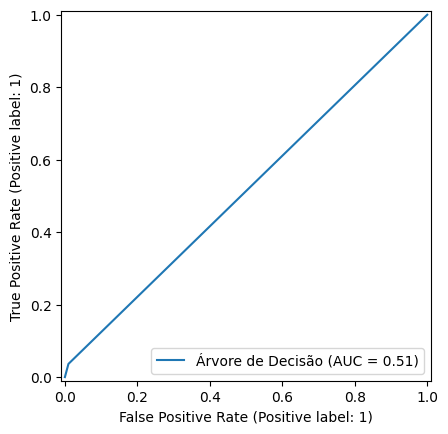

In [91]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

A visualização resultante é a curva ROC que mostra a taxa de verdadeiros positivos (também conhecida como recall) no eixo Y e a taxa de falsos positivos no eixo X.

Para avaliar a eficiência do nosso modelo em diferenciar entre classes, precisamos analisar a curva ROC.

Se a curva estiver o mais próxima possível do canto superior esquerdo do gráfico (ou seja, do ponto 0 no eixo X e 1 no eixo Y), significa que o modelo é eficiente em diferenciar uma classe da outra.

Quando a curva se aproxima de uma linha diagonal traçada no gráfico, indica que o modelo é ineficiente, classificando os dados de maneira aleatória.

Podemos perceber que o nosso modelo está performando mal porque ele está se aproximando de uma linha diagonal e está longe do ponto 0,1.

#### AUC Area Under the Curve (Área Sob a Curva)

Além disso, podemos calcular uma métrica a partir dessa curva ROC, conhecida como AUC. Quanto mais próximo de 1 for o valor do AUC, melhor será o desempenho do modelo, enquanto valores mais próximos de 0,5 indicam um desempenho pior, pois a curva estará mais próxima da linha diagonal.

Podemos analisar esse gráfico de duas formas, tanto o gráfico em si, quanto a métrica que é extraída a partir desse gráfico. E essa métrica é calculada pela área abaixo do gráfico. Então, esse AUC quer dizer Area Under the Curve (Área Sob a Curva).

Também podemos extrair essa métrica de forma isolada da curva ROC. Se quisermos, podemos calcular utilizando também o Scikit Learn.

Importando o roc_auc_score
Na próxima célula, importaremos a função para calcular essa métrica e a calcularemos na célula abaixo. Então, escrevemos:

In [92]:
from sklearn.metrics import roc_auc_score

Na próxima célula, faremos o mesmo processo que fizemos para as outras métricas.

Iremos passar o y_val e y_previsto, ou seja, os valores reais e os valores previstos para que seja feita essa comparação dos resultados do modelo com os valores reais e visualizarmos essa taxa de acerto, no caso, agora do AUC.

In [93]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5133081406321001


#### Conclusão

Agora, nós aprendemos como avaliar o nosso modelo usando a curva ROC e a métrica AUC e notamos que o nosso modelo não está se saindo tão bem na diferenciação entre as classes.

No próximo vídeo, vamos explorar outra curva que analisa tanto a precisão quanto o recall. Vamos buscar um equilíbrio entre essas duas métricas, mas nossa ênfase principal será no recall, que é a métrica mais relevante.

#### Entendendo a curva ROC

Nesse [vídeo](https://video2.alura.com.br/alura/725417186-hd.mp4?token=5GG2fGkbef_vvKfyLKXC2hI5Nmg-rZ930rxTXzyLJBI&expires=1754499598), João Miranda fala sobre um gráfico utilizado para avaliar modelos de classificação binária, a curva ROC. O foco é mostrar como a curva é construída e como realizar a interpretação do gráfico, o que facilita no entendimento do desempenho dos modelos de classificação.

Conteúdos complementares:

Para compreender os conceitos das métricas extraídas da matriz de confusão:

[Alura+ 1440 - Métricas de avaliação para classificação](https://cursos.alura.com.br/extra/alura-mais/metricas-de-avaliacao-para-classificacao-c1440)

Para se aprofundar nos conceitos de curvas de avaliação de modelos:

[Para saber mais: Precision Recall x ROC](https://cursos.alura.com.br/course/machine-learning-oracle-ads-criacao-modelos/task/104260)

### Curva de precisão x Recall

Acabamos de analisar nosso modelo por meio de um gráfico denominado curva ROC, que avalia se estamos conseguindo distinguir adequadamente uma classe da outra. Em outras palavras, estamos avaliando nossa capacidade de diferenciar clientes adimplentes de clientes inadimplentes no contexto do nosso projeto.

Compreendemos, então, que nosso modelo não está apresentando um desempenho satisfatório nessa tarefa, conforme evidenciado tanto pela forma da curva ROC, que estava próxima de uma linha diagonal, quanto pela métrica derivada desta curva, a AUC.

Essa métrica estava próxima de um valor de 0,52, e quanto mais perto de 0,5, pior será o resultado do modelo.

Agora vamos analisar outro gráfico chamado curva de precisão por recall. Este gráfico, como o próprio nome sugere, avalia a métrica recall com a métrica de precisão.

Portanto, se observarmos a nossa matriz de confusão, podemos perceber que este gráfico é construído utilizando os verdadeiros positivos, falsos negativos (no caso do recall), e também verdadeiros positivos com falsos positivos.

Observamos que esse gráfico não utiliza em nenhuma instância os verdadeiros negativos.

Tendo em vista que os verdadeiros negativos estão em maior quantidade no nosso conjunto de dados e que nossos dados estão desequilibrados, essa curva é mais indicada que a curva ROC para verificar o desempenho do nosso modelo em conjuntos de dados onde os dados estão muito desequilibrados, como é o caso do nosso projeto.

Assim, vamos conseguir explorar um equilíbrio entre não perder clientes (que no nosso caso é a precisão) e evitar vender ou emprestar nosso veículo para pessoas que não vão pagar (que é o caso do recall).

Portanto, esse gráfico vai nos mostrar um equilíbrio entre essas duas coisas, em quão bem o modelo está classificando nossos clientes para não perdermos clientes e não tomarmos prejuízo vendendo para pessoas que não vão pagar o empréstimo.

Agora, vamos ao nosso código para criarmos nosso gráfico, da mesma forma que criamos a curva ROC. Primeiro, vamos importar a função da biblioteca Scikit Learn, construir o gráfico e depois analisar como o nosso modelo está se saindo.

Importando a biblioteca:

In [94]:
from sklearn.metrics import PrecisionRecallDisplay

Na próxima, vamos fazer o mesmo procedimento que fizemos com a curva ROC. O from_predictions() é porque iremos construir a curva a partir das previsões que fizemos para gerar a matriz de confusão. Estamos construindo essa curva a partir das previsões que já fizemos previamente para gerar a matriz de confusão. Primeiro, passamos os valores reais (y_val), e os valores previstos (y_previsto).

Também podemos dar um nome para aquela curva, que será Decision Tree, que é o algoritmo que estamos utilizando para a construção do modelo.

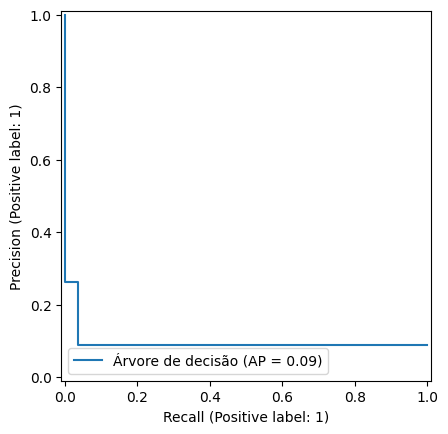

In [95]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

Obtemos um gráfico um pouco diferente do gráfico da curva ROC. No eixo x temos o recall, que é a taxa de verdadeiros positivos. No eixo y temos a precisão, que é a taxa que vamos identificar para não perder tantos clientes que iriam pagar.

Para analisar esse gráfico, ele é diferente da curva ROC. Em vez de quanto mais próximo do ponto 0,1, melhor (ou seja, do canto superior esquerdo), teremos que o modelo vai ser melhor nesse equilíbrio entre essas duas métricas, quanto mais próximo do ponto 1,1 (ou seja, do canto superior direito).

E quanto mais próximo do ponto 0,0, do canto inferior esquerdo, pior será o modelo. No nosso caso, vemos que a curva está muito próxima do ponto 0,0.

No nosso caso, o modelo não está conseguindo equilibrar bem as duas tarefas, detectar eficientemente os clientes inadimplentes, tanto para não perder clientes quanto para evitar vendas para clientes que não pagarão.

#### Métrica Average Precision (AP, precisão média)

A partir do gráfico também, podemos extrair uma métrica, conhecida como AP (Average Precision) ou precisão média. Obtivemos um valor de 0,09. Quanto mais próximo de 0 for essa métrica, pior será o desempenho do modelo. E quanto mais próximo de 1, melhor será o desempenho do modelo.

Portanto, além da curva que analisamos, podemos perceber que na métrica nosso modelo também não está se saindo bem. E podemos extrair essa métrica de forma isolada, sem ser a partir do gráfico.

Vamos fazer isso da mesma forma como fizemos com o AUC. Primeiro vamos importar a função capaz de extrair essa métrica, depois vamos calculá-la na célula abaixo.

Vamos escrever from sklearn.metrics import average_precision_score.

In [96]:
from sklearn.metrics import average_precision_score

Como é bem parecido a forma de obter essa métrica, vamos copiar o código onde calculamos o roc_auc_score, e vamos colar esse código na célula abaixo.

Então, ao invés de ser AUC, será AP, de average precision. E na função, ao invés de ser roc_auc_score, colocamos average_precision_score.

In [97]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09369485848127046


Obtivemos exatamente aquele valor que apareceu no gráfico de 0.09.

#### Conclusão

Agora, exploramos diversas métricas e gráficos que nos permitem analisar o desempenho do modelo. É o momento de resumir todas essas métricas para avaliar o desempenho do modelo de forma mais abrangente.

Até agora, temos calculado as métricas de forma individual, mas elas ainda não estão próximas o suficiente para uma visualização eficaz.

Vamos fazer isso a seguir!

### Relatório das métricas

Exploramos as principais métricas para modelos de classificação e identificamos a mais relevante para o projeto, que foi o recall (recuperação), visando evitar ao máximo possíveis prejuízos para a empresa de empréstimo de automóveis.

Seria útil se tivéssemos um resumo de todas essas métricas em um único lugar, pois até então estamos calculando as métricas de forma isolada. Tivemos que importar uma função para calcular a acurácia (accuracy) e outra para o recall, por exemplo.

Seria muito conveniente se tivéssemos uma tabela com todas as métricas para avaliar o desempenho do modelo de forma mais simples.

#### Classification-report

Existe uma função dentro da biblioteca Scikit-Learn para isso, chamada classification_report. Essa função é capaz de gerar um relatório com as principais métricas de classificação.

Primeiramente, vamos importar essa função da seguinte maneira:

In [98]:
from sklearn.metrics import classification_report

Em seguida, vamos utilizar essa função para gerar a tabela. Como fizemos com as outras métricas, passaremos os valores reais da base de dados de validação e os valores previstos pelo nosso modelo para a função:

In [99]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8906
           1       0.26      0.04      0.06       852

    accuracy                           0.91      9758
   macro avg       0.59      0.51      0.51      9758
weighted avg       0.86      0.91      0.87      9758



O relatório nos fornece uma tabela, cujo resultado e cada coluna e linha vamos agora analisar.

Na primeira coluna temos a precision (precisão). Para as duas primeiras linhas com valor 0 e 1, a precisão e outras métricas são calculadas para cada uma das classes separadamente.

A precision, recall e f1-score que calculamos foi para a classe 1 de clientes inadimplentes, e não adimplentes, que geralmente é o foco dos problemas de classificação.

Por conta disso, ao utilizar as funções de precision, recall e f1-score, obtivemos os valores que estão aparecendo na tabela na segunda linha: 0.25 para precision, 0.04 para recall e 0.07 para f1-score.

Ao contrário, os valores de precision para a classe 0 são maiores, resultando em 0.92 de precision, 0.99 de recall e um f1-score de 0.95. Esse resultado é devido ao desequilíbrio dos dados.

Percebemos que na última coluna da tabela, a coluna chamada "support", existe a quantidade de valores para cada uma das classes. Existem 10.479 clientes adimplentes da classe 0 e 1.002 clientes inadimplentes da classe 1.

Esse desequilíbrio trouxe melhores resultados para a classe 0 porque o modelo talvez tenha conseguido entender o padrão dos dados ou simplesmente pelo fato de ter mais dados desse tipo, ele priorizou acertar esses dados, pois isso resultaria em uma maior taxa de acerto, ou seja, a acurácia (accuracy), que está na terceira linha da tabela.

Apesar de estar na mesma coluna que o f1-score, o 0.91 representa a acurácia do nosso modelo. Como "support" na última coluna, temos na terceira linha 11.481, que é a soma dos clientes adimplentes e inadimplentes.

Nas duas últimas linhas ainda temos duas médias, uma média geral de cada uma das métricas e na última linha temos uma média ponderada para cada uma das métricas em relação à quantidade de elementos que tem na base de dados da cada classe. Por exemplo, no "macro avg", temos a média da precision, recall e f1-score das duas classes.

Se pegarmos como exemplo o recall, obtemos 0.99 de recall da classe 0 mais 0.04 de recall da classe 1. Se somarmos esses valores e dividirmos por 2, obteremos 0.51, que é a média geral dessas duas métricas.

Por fim, temos a média ponderada, que está escrita como "Weighted AVG". Nessa média ponderada, ele leva em consideração não somente a métrica de cada uma das classes, mas também a quantidade de valores de cada uma das classes.

Por exemplo, a precisão da classe 0 é de 0.92. Como essa classe tem uma maior quantidade de clientes, 10.479, essa precisão ficou um pouco mais próxima de 0.92 do que 0.25.

A conta foi realizada da seguinte forma: 0.92 vezes o suporte, que é 10.479, mais 0.25 vezes 1.002, que é o suporte da classe 1, dividido pela soma total de clientes, sendo 11.481.

Assim, ao realizar esse cálculo, obtemos uma média ponderada e ela está em uma posição superior devido ao fato de a precisão, recall e F1 score da classe 0 estarem maiores.

A partir dessa tabela, já temos um resumo com as principais métricas que podemos avaliar. Nosso modelo não teve um bom desempenho para a classe 1.

Ele teve uma precisão de 0.25, principalmente o recall, que é a métrica que queremos aprimorar em nosso modelo, teve um resultado de 0.04, bastante baixo. Já o F1 score, que é um equilíbrio entre essas duas métricas, foi de 0.07.

#### Conclusão

Esse resumo foi bastante importante para avaliarmos nosso modelo de forma bastante direta, sem precisar calcular cada uma das métricas separadamente.

Mas até o momento, estamos validando nosso modelo utilizando um conjunto de dados de treinamento e de validação. Existem outros tipos de validação que podemos utilizar para avaliar o desempenho do nosso modelo, que são ainda mais consistentes e são mais utilizados em projetos de Machine Learning.

Na próxima aula, vamos analisar esses outros tipos de validação que podemos aplicar em nossos projetos.

Até mais!

## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

Criamos um modelo de classificação e, ao avaliar seu desempenho com a métrica de recall, a mais relevante para o nosso problema, encontramos um resultado insatisfatório de 0.04. Contudo, no processo de validação desse modelo, fizemos uma separação de dados entre treinamento e validação.

O potencial problema aqui é que, durante esse processo, ao ser realizada uma separação estratificada - mantendo a mesma proporção de dados de clientes inadimplentes e adimplentes em ambos os conjuntos de dados - pode ter ocorrido uma distribuição que gerou um padrão de dados no conjunto de treinamento e um padrão diferente no conjunto de validação.

Caso esses dois conjuntos apresentem padrões de dados muito distintos, no momento do treinamento do modelo, ele vai aprender um tipo de padrão e, ao avaliar o desempenho desse modelo nos dados de validação, não conseguirá ter um bom desempenho, porque os dados funcionam de uma maneira diferente, ou seja, têm um padrão diferente.

Para evitar esse tipo de problema, podemos utilizar uma estratégia mais confiável e segura: a validação cruzada. Em vez de utilizar um conjunto de dados para treinamento e outro para validação, dividiremos nosso conjunto de dados em mais partes.

Já fizemos uma separação do conjunto de dados de teste, então essa divisão não precisa ser realizada novamente. Vamos focar em utilizar aqueles dados XY, que é o conjunto das partes de validação e treinamento, e dividir esses dados em cinco partes.

Quantas partes podemos utilizar? Quanto mais partes utilizarmos, melhor será a mitigação do problema levantado. Porém, mais processamento será necessário, pois será gerado um modelo para cada uma das separações utilizadas.

A compreensão geral é que a partir de dez divisões não é tão necessário assim, porque com dez divisões já é suficiente para mitigar esse problema e não ter um processamento tão grande, logo é um valor de equilíbrio. No nosso caso, vamos utilizar uma divisão de dados em cinco partes, o que também é benéfico. É uma estratégia melhor do que fazer uma divisão entre treinamento e validação, pois vai evitar o problema mencionado.

Mas como funciona esse processo de validação cruzada? Dividimos os dados em cinco partes, uma das partes será usada como validação e as outras como treinamento. Então, será gerado um modelo a partir desses dados de treinamento e validação, no entanto, esse conjunto de dados de validação vai mudar da primeira para a segunda parte, gerando um novo modelo.

Esse modelo, então, vai usar a segunda parte como validação e todas as outras como treinamento. Este processo se repetirá até que cada parte da divisão seja utilizada pelo menos uma única vez para validação.

Este processo, no caso, irá gerar cinco modelos, porque fizemos a divisão em cinco partes e o desempenho do modelo será a média da métrica escolhida como resultado geral. Dessa forma, vamos amenizar um pouco o problema de dividir nossos dados de forma aleatória em duas partes.

Agora, vamos utilizar a validação cruzada com cinco partes, e um de seus métodos, conhecido como KFold. Existem diferentes estratégias dentro da validação cruzada, mas a mais simples é feita sem nenhum critério específico. Nós dividiremos simplesmente os dados em cinco partes, utilizando uma parte para validação e as demais para treinamento, de forma aleatória. O método KFold opera dessa maneira.

Na primeira célula, importaremos o método capaz de executar a validação cruzada, bem como o tipo de validação cruzada que será o KFold:

In [100]:
from sklearn.model_selection import cross_validate, KFold

om este comando, estamos importando duas funções: uma capaz de realizar o processo de validação cruzada e o KFold, que é um dos métodos de validação cruzada.

Vamos executar essa célula.

Feito isso, na célula seguinte, inicializaremos o modelo e o tipo de validação cruzada que será usada:

max_depth corresponde à profundidade máxima e n_splits à quantidade de divisões que serão feitas no nosso conjunto de dados, no caso, cinco partes. O parâmetro shuffle=True embaralha o nosso conjunto de dados antes de dividir em cinco partes. Isso é relevante porque o KFold, por padrão, divide nossos dados na ordem em que eles aparecem na base de dados, o que pode levar a um viés se existir um padrão nessa ordem. Portanto, para evitar o padrão e tornar nosso processo de validação mais robusto, embaralharemos os dados.

Para podermos obter os mesmos resultados nesta divisão, usaremos random_state=5. Se você usar este valor, obterá a mesma divisão e os mesmos resultados do modelo.

Em seguida, armazenaremos os resultados. Como mencionado, o KFold e a validação cruzada gerarão mais de um modelo. Para armazenar os resultados, usaremos a função cross_validate(). Para essa função, passamos os dados que serão divididos. Anteriormente, armazenamos todo o conjunto de treinamento e validação nas variáveis x e y, por isso devemos passá-las. Além disso, passamos cv=kf, que é o método de validação cruzada que usaremos.

In [101]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.20462584, 0.21603751, 0.28813481, 0.26934791, 0.2705555 ]),
 'score_time': array([0.00394964, 0.00519919, 0.00625563, 0.00440645, 0.00449038]),
 'test_score': array([0.90239529, 0.9087998 , 0.90507302, 0.9066103 , 0.91096592])}

Note que nos é retornado um dicionário com várias informações. A primeira chave do dicionário é fit_time, que é o tempo demorado para ajustar cada um dos modelos. Isso é retornado como um array com cinco resultados, ou seja, o tempo para cada um dos modelos, já que separamos em cinco partes.

O segundo valor do dicionário, score time, representa o tempo levado para calcular cada uma das métricas do nosso modelo. Já test_score é o desempenho de cada um dos modelos criados. Como estamos mais interessados no test_score, que é o resultado do modelo, vamos optar por usá-lo ao invés de usarmos todo o dicionário.

Ao invés de analisarmos todos esses valores, vamos tirar uma média e um intervalo de confiança. O intervalo de confiança nos dirá que, provavelmente, o resultado do nosso modelo ficará entre um valor mínimo e um valor máximo. Portanto, é realmente uma medida de confiança, garantindo que alcançaremos um resultado dentro desse intervalo.

Para construir isso, primeiro vamos pegar cv_resultados, e adicioná-lo na próxima célula. Se acessarmos os colchetes, e passarmos 'test_score', percebemos que, executando essa célula, obteremos apenas o array com as métricas de desempenho. Então, é isso que usaremos para calcular uma média desses resultados e um desvio padrão para definir o intervalo do desempenho.

In [102]:
cv_resultados['test_score']

array([0.90239529, 0.9087998 , 0.90507302, 0.9066103 , 0.91096592])

Na célula seguinte, vamos extrair a média, o desvio padrão e criar o intervalo de confiança. Esse intervalo de confiança vai de um ponto mínimo a um ponto máximo. O ponto mínimo é a média menos 2 vezes o desvio padrão; enquanto o ponto máximo é a média mais 2 vezes o desvio padrão. Como nossas métricas têm o valor máximo de 1, colocaremos que o ponto máximo deste intervalo de confiança não deve passar de 1:

In [103]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.9008514873285098, 0.9126862428748548]


Ao executar esta célula podemos perceber que, ao utilizar a validação cruzada com KFold, obtivemos um intervalo de confiança de 0.89 até 0.91. Portanto, é mais seguro dizer que o nosso modelo terá um desempenho entre 0.89 e 0.91. Ou seja, está na média de 0.90.

Acontece que essa é a acurácia e estamos interessados, na verdade, no recall. Será que nós podemos utilizar essa validação cruzada para obter também o recall? Veremos a seguir.

### Validação cruzada com Recall

Estamos usando o processo de validação cruzada para avaliar o desempenho do nosso modelo de classificação e obtivemos um intervalo de confiança de 0.89 a 0.91. Esse resultado é bem próximo da acurácia obtida pelo processo de validação simples, realizado na divisão entre os dados de treinamento e validação. Entretanto, apesar de serem resultados semelhantes, não significa que isso ocorrerá na maioria das vezes.

O processo de validação cruzada é importante para obter um resultado mais confiável, indicando que o nosso modelo terá um desempenho adequado quando aplicado a dados reais. No entanto, obtivemos um intervalo de confiança para a acurácia, quando a métrica que queremos avaliar é o recall. Essa métrica é mais importante para identificar se a empresa terá prejuízo ou não, isto é, se está conseguindo classificar adequadamente os clientes.

Vamos, então, aplicar o processo de validação cruzada utilizando o recall como métrica de desempenho. Primeiramente, no nosso código, vamos copiar o trecho que cria o intervalo de confiança e criar uma função para facilitar a extração desse intervalo.

Copiamos esse código e colamos na primeira célula vazia do nosso projeto. Feito isso, definiremos uma função chamada intervalo_conf() na primeira linha deste código:

In [104]:
def intervalo_conf():
    media = cv_resultados['test_score'].mean()
    desvio_padrao = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Como parâmetro desta função, passamos os resultados da validação cruzada. Além disso, colocamos o resto do código para dentro da função em questão. Como passamos resultados como parâmetro, vamos alterar o nome de cv_resultados para resultados:

In [105]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Agora, vamos aplicar a validação cruzada utilizando o recall como métrica de desempenho. O processo de usar a validação cruzada com outra métrica é muito semelhante ao anterior. Sendo assim, podemos copiar o trecho de criação da validação cruzada e acrescentar a métrica de desempenho que vamos avaliar: o recall. Faremos isso dentro da função cross_validate(), depois de cv=KF, incluindo scoring = 'recall'.

In [106]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.27856183, 0.28157997, 0.27264667, 0.29251957, 0.30156755]),
 'score_time': array([0.00986552, 0.00818801, 0.00772476, 0.00802088, 0.00844312]),
 'test_score': array([0.02542373, 0.03742515, 0.03025937, 0.03030303, 0.0124031 ])}

Ao executar esta célula, obtemos um resultado diferente do anterior. No test_score, por exemplo, temos valores como 0.02 e 0.01, que indicam o recall do nosso modelo.

Para extrair o intervalo de confiança, podemos utilizar a função que foi criada. Para isso, na célula seguinte, vamos escrever intervalo_conf e passar cv_resultados como parâmetro.

In [107]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.010534256931553715, 0.043791493303093704]


O recall que havíamos obtido anteriormente era de aproximadamente 0.04. Logo, esse intervalo de confiança nos indica que é mais seguro afirmar que o nosso recall está dentro desses valores.

Conseguimos entender como usar a validação cruzada com outra métrica, o recall. Porém, ainda estamos utilizando o método KFold, que divide os conjuntos de dados de validação e treinamento em cinco partes, de forma aleatória.

Será que existe uma forma mais adequada para aplicarmos esse processo de validação cruzada em nosso tipo de dado? Veremos isso no próximo vídeo.

### Estratificando os dados

Estamos utilizando um processo muito mais confiável para avaliar o desempenho do nosso modelo de classificação: a validação cruzada. No entanto, estamos usando o método KFold, um tipo de procedimento de validação cruzada que não se baseia em qualquer critério específico. Este método se limita a embaralhar e dividir os dados de forma aleatória.

Se lembrarmos, em nosso conjunto de dados existe um desequilíbrio entre os dados de clientes adimplentes e inadimplentes. Primeiro, vamos verificar essa proporção e, em seguida, explorar como podemos realizar a separação de maneira mais eficaz durante a validação cruzada.

Então, na célula seguinte, vamos escrever a coluna dados['inadimplente']. Em seguida, podemos fazer uma contagem dos valores usando value_counts(), com o argumento normalize = True. Dessa forma, o resultado será apresentado em porcentagem, permitindo-nos ver a proporção.

In [108]:
dados['inadimplente'].value_counts(normalize = True)

,proportion
inadimplente,
0,0.912707
1,0.087293


Ao executar o código, vemos que nosso conjunto tem cerca de 91% de dados de clientes adimplentes e 8% de dados de clientes inadimplentes.

No processo do KFold, é improvável que esta proporção seja mantida em cada uma das divisões do conjunto de dados. Portanto, precisamos usar uma estratégia para estratificar esses dados, assim como fizemos no processo de divisão simples de treinamento e validação.

Para isso, vamos usar uma função do sklearn, o StratifiedKFold. Em vez de simplesmente utilizar o KFold, ele realiza o KFold de maneira estratificada, levando em conta a proporção de dados de clientes adimplentes e inadimplentes. Na próxima célula, vamos executar o seguinte comando:

In [109]:
from sklearn.model_selection import StratifiedKFold

Agora que importamos este método, vamos proceder com o processo de validação de forma similar ao KFold, mas usando o StratifiedKFold.

Na próxima célula, vamos inicializar o modelo com modelo = DecisionTreeClassifier(max_depth = 10). Em seguida, ainda na mesma célula, escolheremos o método de validação cruzada. Vamos definir skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5) para realizar a divisão em 5 partes, fazer o embaralhamento dos dados antes da separação e definir o estado aleatório como 5.

Na mesma célula, vamos armazenar os resultados da validação cruzada em cv_resultados passando cross_validate(modelo, X, y, cv=skf, scoring='recall'). Desta forma, podemos avaliar o recall por meio da validação cruzada.

In [110]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

Lembre-se que 'x' representa as variáveis explicativas e 'y' a variável alvo.

Na próxima célula, vamos utilizar a função do intervalo de confiança para obter o intervalo de confiança do recall. Portanto, escreveremos intervalo_conf(), passamos cv_resultados e executamos a célula:

In [111]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.006879613981265242, 0.05064403805709476]


Como resultado, obtemos o intervalo de confiança de 0.02 até 0.03.

Se observarmos o intervalo anterior, ele era de 0.01 até 0.03 - muito similar, mas agora vemos que existe uma maior consistência.

Portanto, o resultado obtido é mais conciso, variando de 0.02 a 0.03, ao invés de 0.01 a 0.03, devido à divisão estratificada dos conjuntos de dados. Isso nos proporciona um resultado mais confiável, considerando a forma como nosso conjunto de dados funciona, devido ao desequilíbrio entre os dados de clientes inadimplentes e adimplentes.

Tendo compreendido que o nosso modelo não está apresentando desempenho satisfatório, temos uma maior confiança de que o resultado obtido é verdadeiro. A seguir, vamos avaliar estratégias que podem ser adotadas para identificar melhor os clientes inadimplentes, de forma que a empresa não sofra tantas perdas financeiras.

### Para saber mais: outros métodos de validação

Além da validação cruzada com KFold tradicional e estratificada, existem outros tipos de validação que podem ser utilizados em projetos de machine learning. A escolha da utilização dependerá das características dos dados do projeto. Vamos explorar mais adiante três novas abordagens de separação dos dados usados para simular o processo de aprendizagem em dados futuros.

#### GroupKFold

O método GroupKFold é uma variação da validação cruzada KFold tradicional e é utilizado quando os dados possuem alguma estrutura de grupo ou dependência que não deve ser quebrada, geralmente uma característica em uma das colunas da base de dados.

Essa abordagem utiliza uma estratégia de separação dos dados para que os registros pertencentes a um grupo específico sejam mantidas juntas durante as divisões do KFold, garantindo que não sejam separadas entre os conjuntos de treinamento e validação. Isso é útil para evitar possíveis vieses e garantir que o modelo generalize para grupos desconhecidos, ou seja. Mesmo que não tenha um dado do grupo no conjunto de treinamento, o modelo precisará ter um bom desempenho ao prever o resultado para os dados daquele grupo.

#### Leave-p-out

O método Leave-p-out funciona de maneira diferente do método KFold. Ao invés de dividir o conjunto de dados em uma quantidade fixada de conjuntos, será escolhida uma quantidade 'p' de elementos para serem deixados de fora do treinamento. Os dados serão treinados em todo o restante e validados apenas nos 'p' elementos. Esse processo é repetido até que todos os dados sejam utilizados como dados de validação. O resultado final pode ser considerado a média dos resultados obtidos nos modelos, assim como é feito na validação cruzada tradicional.

Isso proporciona uma validação bem mais completa, já que considera todas as combinações possíveis de dados de treino e validação. Porém, é muito mais custosa computacionalmente, já que serão criados muitos modelos e isso aumenta a quantidade conforme o conjunto de dados seja muito grande e o valor escolhido para 'p' seja pequeno.

#### Leave-one-out

O método Leave-one-out é uma forma especial do Leave-p-out, onde é escolhido o valor de p=1. Dessa maneira, apenas uma amostra é reservada para validação e todos os outros dados são escolhidos para treinamento. Esse processo é repetido para todas as amostras da base de dados. Isso significa que, se houver 1000 linhas na base de dados, serão treinados 1000 modelos distintos.

É de se esperar que esse método demanda muito computacionalmente, pela criação de um modelo para cada linha da base de dados. Portanto, ele é indicado somente nos casos em que a base de dados é muito pequena. Nessas situações, é interessante utilizar a maior quantidade de dados possível para treinamento, para que o modelo consiga entender o padrão dos dados. Outra estratégia de validação cruzada removeria muitos dados que seriam úteis no treino.

Caso deseje saber mais sobre outros métodos de validação disponíveis na biblioteca Scikit-Learn, você pode consultar a documentação [Validação cruzada: avaliando o desempenho do estimador.](https://scikit-learn.org/stable/modules/cross_validation.html)

Caso queira criar uma visualização para ter um melhor entendimento de como foi realizada a divisão dos dados em algum projeto, seja com o KFold, StratifiedKFold ou GroupKFold, você pode explorar a documentação [Visualizando o comportamento de validação cruzada no scikit-learn.](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)

## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

A quantidade de clientes inadimplentes e adimplentes no nosso conjunto de dados está muito desbalanceada e já estamos utilizando o melhor método para validar o nosso modelo, que é a validação cruzada estratificada.

Isso nos dá uma maior segurança ao afirmar que o desempenho do nosso modelo está correto, dentro do intervalo de confiança estabelecido. Entretanto, isso não contribui para o desempenho em si do modelo, apenas avalia da melhor maneira possível.

Agora vamos utilizar estratégias para tentar melhorar esse desempenho, porque com dados desbalanceados, o que pode estar acontecendo é que o nosso modelo não está entendendo tão bem o padrão dos dados que tem menor quantidade, simplesmente por esse fato.

A estratégia que adotaremos é tentar equilibrar esta quantidade de dados, para que as duas classes tenham a mesma quantidade. Assim, notaremos se o modelo que iremos construir conseguirá diferenciar bem esses dados, já que terá a mesma quantidade de informação para as duas classes.

**SMOTE**

A primeira estratégia será a oversampling (sobreamostragem). Nesta estratégia, vamos aumentar a quantidade de dados da classe que tem menor quantidade, que no caso são a quantidade de clientes inadimplentes. O oversampling normal, que seria o aleatório, duplica a quantidade de elementos da classe de menor quantidade de forma aleatória.

Porém, vamos utilizar um método conhecido como SMOTE (Synthetic Minority Over-sampling Technique ou técnica de sobreamostragem minoritária sintética). É um algoritmo que, ao invés de simplesmente duplicar os elementos da classe de menor quantidade, cria novos dados sintéticos com padrão semelhante aos dados que já existem.

Dessa maneira, o modelo pode entender um pouco mais como funciona aquele padrão de dados e vai conseguir diferenciar melhor as duas classes.

Vamos fazer o oversampling utilizando o método SMOTE, disponível na biblioteca imblearn, que já vem instalada no Google Colab. Vamos importar o método e depois aplicar nos nossos dados.

In [112]:
from imblearn.over_sampling import SMOTE

Após executar essa célula, na célula seguinte, vamos realizar o balanceamento dos nossos dados. Já temos os dados armazenados em x e y e vamos balancear esses dados utilizando o SMOTE. Ele vai criar novos registros tanto nas variáveis explicativas quanto na variável alvo.

Primeiro, precisamos iniciar esse algoritmo. Ele é um algoritmo que, assim como os de inteligência artificial, precisa ser inicializado antes de usarmos para fazer o balanceamento dos dados.

Vamos escrever oversample igual à SMOTE() na primeira linha. Na segunda linha, vamos colocar x_balanceado, y_balanceado igual à variável oversample.fit_resample().

Dessa maneira, ele vai entender o padrão dos dados e gerar novos dados com padrões semelhantes. Desta forma, ele terá a mesma quantidade de dados tanto de clientes adimplentes quanto inadimplentes.

Vamos passar como parâmetros do fit_resample() o x e o y, que são os nossos dados originais.

In [113]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

Ao executar essa célula, ele já terá feito o balanceamento dos dados e podemos verificar se foi feito corretamente.

Vamos colocar a variável alvo com a quantidade de clientes adimplentes e inadimplentes y_balanceado.value_counts(), passando normalize igual à True.

In [114]:
y_balanceado.value_counts(normalize = True)

,proportion
inadimplente,
0,0.5
1,0.5


Assim, podemos verificar que agora existe 50% de dados da classe 0 de clientes adimplentes e 50% de dados de clientes inadimplentes. Desta forma, ele fez um balanceamento dos dados.

Agora, vamos treinar o modelo usando esses dados. Assim, o modelo pode entender melhor como está o padrão de cada um desses clientes.

Na próxima célula, vamos criar o modelo, escrevendo modelo igual à DecisionTreeClassifier(), passando max_depth igual à 10.

Na próxima linha, vamos escolher o método de validação cruzada, que será skf igual à StratifiedKFold(). Mesmo com o balanceamento dos dados, usaremos o StratifiedKFold() para manter essa proporção em cada conjunto de dados. Afinal, é a melhor maneira de garantir esta mesma proporção.

Entre os parênteses, passaremos os seguintes parâmetros: n_splits igual à 5, shuffle igual à True e random_state igual à 5.

Na próxima linha, escreveremos cv_resultados igual à cross_validate(), passando como primeiro parâmetro o modelo e como segundo parâmetro, ao invés de passarmos x, passaremos o x_balanceado.

Como terceiro parâmetro passaremos y_balancado e também o cv igual à skf. Finalmente, colocaremos como último parâmetro o scoringigual à recall entre aspas, que é a métrica que queremos avaliar.

In [115]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

Depois desta instrução, podemos obter um intervalo de confiança. Então, executaremos essa célula e, na próxima, obteremos o intervalo de confiança do recall através da instrução intervalo_conf(), passando cv_resultados como parâmetro, que foi a função que criamos para obter o intervalo de confiança.

In [116]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6892021904243331, 0.7572934546400405]


Confira que interessante: o intervalo de confiança para o recall, que antes apresentava um resultado entre 0.02 e 0.03, agora obtivemos um resultado entre 0.69 e 0.78. O modelo, de fato, melhorou muito com essa estratégia.

No entanto, questionamos se aplicamos a estratégia corretamente. Balanceamos os dados e depois fizemos a separação deles usando o cross_validate(). Porém, no momento de avaliar o desempenho deste modelo, avaliamos em dados balanceados.

Na vida real, os dados não estarão balanceados. O que fizemos aqui não é completamente correto, porque balanceamos todos os nossos dados e no momento da avaliação, avaliamos esses dados já balanceados. O objetivo de nossa estratégia é somente para o modelo aprender o padrão dos dados balanceados, para que ele consiga diferenciá-los. Contudo, na hora da avaliação, temos que utilizar dados desbalanceados, pois é assim que eles se apresentam no mundo real.

Nosso resultado aqui foi bem alto, mas otimista demais, porque estamos avaliando em dados que não representam a realidade. Mais adiante, iremos explorar a forma correta de aplicar o oversampling utilizando a validação cruzada. Pois, apesar de ter melhorado o resultado do nosso modelo, este resultado não é o real.

### Para saber mais: balanceamento de dados

Em problemas de classificação, podemos nos deparar com bases de dados em que a variável alvo contenha classes muito desbalanceadas, ou seja, contendo categorias com frequências muito diferentes. Ao treinar um modelo com a variável desbalanceada, pode ser que o padrão dos dados para a classe dominante se sobressaia em relação aos da classe com menor frequência, gerando um modelo com desempenho muito baixo para classificar a classe de menor frequência.

Para contornar esses problemas gerados pela base de dados desbalanceada, podemos recorrer a duas soluções que consistem em equilibrar os dados da variável alvo: undersampling e oversampling. Essas estratégias são úteis para que o modelo consiga compreender melhor o padrão dos dados, mas é importante destacar que elas também possuem desvantagens e ressalvas que precisamos analisar antes de utilizá-las.

#### Oversampling

A estratégia de oversampling consiste em aumentar a quantidade de dados da classe que possui menor frequência até que tenha a mesma quantidade da classe de maior frequência. Dessa maneira, o modelo se atentará mais para o padrão dos dados da classe que tinha menor frequência a princípio e poderá diferenciar melhor as duas classes.

Para aumentar a quantidade de dados precisamos gerar novos registros na base de dados. É possível utilizar um oversampling aleatório para duplicar registros de maneira randômica ou usar uma técnica como o SMOTE para gerar dados sintéticos com um padrão próximo dos dados existentes. A desvantagem dessa estratégia é a possibilidade de overfitting do modelo, principalmente ao ser utilizado o oversampling aleatório. Nesse caso, o modelo pode se especializar demais no padrão dos dados que são muito parecidos ou idênticos, já que são copiados ou gerados sinteticamente.

#### Undersampling

A estratégia de undersampling é contrária ao oversampling, e consiste em reduzir a quantidade de dados da classe que possui maior frequência até que tenha a mesma quantidade da classe de menor frequência. Dessa forma, o modelo não dará atenção somente aos dados de maior quantidade e poderá diferenciar melhor as duas classes.

Para reduzir a quantidade de dados, precisamos remover ou deletar registros existentes. É possível utilizar um undersampling aleatório para selecionar os registros que serão mantidos ou usar técnicas que selecionam ou removem dados a partir de um padrão estabelecido. A principal desvantagem da estratégia de undersampling é a de remover dados que podem ser muito importantes para o entendimento do problema, principalmente quando essa remoção é feita sem nenhum critério, como é o caso do undersampling aleatório.

Ambas as estratégias são válidas para a tentativa de melhorar o desempenho de um modelo de classificação, mas devemos ficar atentos ao utilizá-las devido aos pontos negativos que são inerentes a cada um dos métodos. Em qualquer projeto que seja utilizado alguma dessas ferramentas, deve ser feita uma análise para identificar se de fato elas ajudaram ou atrapalharam o desempenho do modelo de classificação.

### Para saber mais: biblioteca imblearn

A classificação de dados desbalanceados pode se tornar uma tarefa bem desafiadora, já que a abordagem tradicional de treinar um modelo usando esses dados leva frequentemente a resultados muito insatisfatórios, em que o modelo tende a favorecer a classe com maior quantidade de dados em detrimento da outra.

Para lidar com esse tipo de situação, a biblioteca imbalanced-learn, abreviada como imblearn, oferece diversas técnicas e ferramentas com intuito de equilibrar a distribuição das categorias da variável alvo e melhorar o desempenho de modelos de machine learning. As técnicas consistem em algoritmos de reamostragem de oversampling, undersampling e algoritmos que combinam as duas estratégias simultaneamente.

Alguns dos algoritmos de oversampling da biblioteca:

- [RandomOversampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)
- [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
- [ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)
- [KMeansSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

Alguns dos algoritmos de undersampling da biblioteca:

- [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
- [NearMiss](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)
- [ClusterCentroids](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html)
- [TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

Algoritmos que combinam as duas técnicas de oversampling e undersampling:

- [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)
- [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

Além das técnicas de balanceamento de dados, a biblioteca fornece ferramentas para construção de [pipelines de dados](https://imbalanced-learn.org/stable/references/pipeline.html), [algoritmos de machine learning](https://imbalanced-learn.org/stable/references/ensemble.html) para dados desbalanceados e cálculos de [métricas de desempenho de modelos](https://imbalanced-learn.org/stable/references/metrics.html).

### Pipeline para validação

Nós utilizamos uma estratégia para balancear nossos dados com base na variável alvo de clientes inadimplentes. Contudo, o processo de validação cruzada está sendo realizado em dados balanceados. Isso representa um problema, já que os dados do mundo real não são balanceados.

Essa estratégia deve ser aplicada somente para o modelo aprender o padrão dos dados. No momento de avaliar esse modelo, para verificar se está ou não acertando, precisamos avaliar em dados desbalanceados.

Então, como podemos implementar o processo de balanceamento de dados em conjunto com a validação cruzada?

Vamos precisar utilizar um pipeline de dados. Um pipeline é uma sequência de transformações, operações que realizamos nos dados.

Queremos colocar o processo de transformação do oversampling em conjunto ao modelo. Dessa forma, quando passarmos esse pipeline para validação cruzada, primeiramente será feita a separação dos dados e, em cada conjunto de dados que foi separado para validação e treinamento, o equilíbrio dos dados será feito somente com base nos respectivos dados.

A partir disso, no momento de validar os dados, os dados de validação não estarão balanceados. Eles vão estar na forma como são encontrados no mundo real. Assim, teremos uma validação correta, avaliando o desempenho dos dados que funcionam como o mundo real.

Como construímos esse pipeline? A própria biblioteca imblearn possui uma função para aplicar esse pipeline. Vamos utilizá-la, pois estamos aplicando o processo de oversampling dessa biblioteca.

A scikit-learn também tem um método de pipeline, mas não vai funcionar aqui porque os procedimentos de transformação do scikit-learn funcionam de forma um pouco diferente do oversampling da biblioteca imblearn. Logo, vamos utilizar o pipeline dessa biblioteca por conta disso.

Na primeira célula, escrevemos from imblearn.pipeline para importar o método Pipeline com a letra "P" em maiúscula com o apelido imbpipeline.

Com esse apelido, identificamos que utilizaremos o pipeline do imblearn e evitamos confusões em outros projetos que venham a utilizar outros pipelines distintos.

In [117]:
from imblearn.pipeline import Pipeline as imbpipeline

Após executar essa célula, vamos iniciar o modelo e passar ao pipeline tanto o oversampling com SMOTE quanto o modelo.

Primeiro, escrevemos modelo igual à DecisionTreeClassifier(), passando max_depth = 10.

Na próxima linha da mesma célula, vamos criar esse pipeline e passar as etapas que serão utilizadas durante esse processo. A primeira etapa será o oversampling e, em seguida, o modelo.

Cada uma dessas etapas precisa ser nomeada, portanto, atribuímos nomes para facilitar a identificação posterior de cada uma delas.

Primeiramente, digitaremos pipeline igual à imbpipeline(), passando uma lista de etapas do pipeline entre colchetes.

O primeiro elemento dessa lista será uma tupla, porque vamos passar o SMOTE e também o nome dessa etapa. Por isso, abrimos parênteses, e escrevemos oversample entre aspas e, como segundo elemento da tupla, o método SMOTE() em maiúsculo.

Em seguida, abriremos uma nova tupla para o indicar o modelo. Entre parênteses, vamos passar arvore entre aspas para identificar que será utilizado o modelo de árvore de decisão. Após adicionar uma vírgula, vamos passar o modelo que inicializamos.

In [118]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

Ao executar essa célula já criamos o pipeline. Esse pipeline aplica primeiro o SMOTE nos dados e, em seguida, aplica o modelo.

Agora, vamos utilizar o processo de validação cruzada, da mesma forma que já conhecemos, mas, ao invés de passar o modelo, vamos passar o pipeline.

Para isso, podemos copiar o trecho de código que utilizamos para inicializar o StratifiedKFold() e o cv_resultados. Em uma célula vazia, vamos colar e fazer uma alteração.

Ao invés de colocar o modelo dentro do cross_validate(), passamos o pipeline. E como não estamos utilizando diretamente os dados de x_balanceado e y_balanceado, passamos somente x e y.

In [119]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

Dessa maneira, o pipeline executará primeiro o SMOTE em x e y para cada uma das partições que foi feita no StratifiedKFold. Só depois disso, aplicará o modelo em cada uma dessas partes que estão balanceadas.

No processo de validação, será validado em dados não balanceados, ou seja, teremos um resultado mais justo, mais consistente e não tão otimista.

Vamos executar essa célula e, na próxima, vamos calcular o intervalo de confiança. Isto é, intervalo_conf(), passando cv_resultados.

In [120]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.18962923870783932, 0.2763174241693337]


Vamos executar a célula para conferir o resultado. Obtivemos um intervalo de confiança de 0.24 a 0.31. Anteriormente, tínhamos um resultado de 0.69 a 0.78, então o resultado caiu bastante apenas por adotarmos um processo mais correto.

Ainda que o resultado anterior tenha sido melhor, ele não era correto. Logo, não devemos usar um método só porque ele gera um resultado melhor, mas sim, usar o método que está correto.

Aplicando o procedimento de forma correta, obtemos um resultado de recall entre 0.24 e 0.31. Este resultado, comparado ao recall anterior que era de 0.02, representou uma melhora significativa.

Essa estratégia trouxe um resultado melhor para o nosso recall, no entanto, podemos explorar ainda outra estratégia que balanceará nossos dados por meio do processo de undersampling, que, ao contrário do oversampling, envolve a remoção ou seleção de dados da classe que tem maior frequência para equilibrar a quantidade de dados das classes.

Isso falaremos no próximo vídeo.

### Undersampling

Nós utilizamos o pipeline para aplicar o processo de oversampling nos nossos dados em conjunto com o processo de validação cruzada. Utilizamos essa estratégia para balancear os dados e obtivemos uma melhora no desempenho de recall do nosso modelo.

Agora, vamos aplicar outra técnica de balanceamento de dados conhecida como undersampling (subamostragem). Ao invés de aumentar a quantidade de dados da classe que tem menor quantidade, vamos fazer o contrário. Reduziremos a quantidade de dados da classe que tem maior quantidade, até que ela tenha a mesma quantidade de dados que a classe com a menor quantidade.

Existe um processo de undersampling aleatório que não utiliza nenhum critério para a remoção dos dados. Ele simplesmente remove dados aleatoriamente da base de dados da classe que tem maior quantidade. Porém, esse processo não é tão recomendado porque pode ser que, durante esse processo, dados importantes para o modelo compreender o padrão dos dados sejam perdidos.

Ao invés do undersampling aleatório, vamos aplicar outra técnica de undersampling que se chama NearMiss. Nessa estratégia, há um critério de escolher os elementos que vão continuar na base de dados que tenham um padrão bem parecido com os elementos que já existem na outra classe.

Dessa maneira, o modelo tentará identificar, nas nuances dos dados, qual é a diferença de uma classe para a outra. Esse método de undersampling é melhor do que a utilização do undersampling aleatório porque ele utiliza um critério para a seleção dos dados que vão ser mantidos.

Esse método NearMiss também está presente na biblioteca imblearn. Portanto, faremos a importação desse método para dentro do nosso código.

In [121]:
from imblearn.under_sampling import NearMiss

Agora que já sabemos que precisamos aplicar o pipeline junto do processo de validação cruzada, não faremos o balanceamento dos dados antes de aplicar o processo de validação cruzada. Vamos colocar isso em um pipeline.

Primeiramente, vamos criar o modelo, que é aquele mesmo que já conhecemos. Por isso, vamos copiar o código daquela etapa de criação do modelo e do pipeline. Vamos colar na próxima célula vazia.

Vamos utilizar o mesmo modelo, mas dentro do pipeline, ao invés de oversample, escreveremos undersample.

E no método SMOTE(), vamos substituir pelo método NearMiss(). Dentro dos parênteses desse método, vamos escolher uma das versões do NearMiss. Vamos escolher a version igual à 3.

Essa versão é utilizada para a escolha dos elementos que vão ser mantidos na base de dados. Existem as versões 1, 2 e 3. E se quiser saber mais sobre cada uma das versões, será disponibilizada uma atividade, logo após esse vídeo, para entender como funciona o processo de escolha dos elementos com base na versão.

In [122]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

Nessa mesma célula, depois de escrever o pipeline, vamos copiar o código de escolha do StratifiedKFold() e do cross_validate(). Então, vamos copiar e colar na linha abaixo.

Vamos verificar se o processo está sendo feito da forma correta para esse pipeline. Primeiro é utilizado o StratifiedKFold(), separado em cinco partes. E no cross_validate() é utilizado o pipeline, que está sendo construído agora, utilizando o NearMiss e os dados x e y.

In [123]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

Na célula abaixo, vamos utilizar o intervalo de confiança. Então, vamos escrever intervalo_conf(), passando cv_resultados.

In [124]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6010944590946523, 0.7328443319707552]


Após executar a célula, obtivemos um intervalo de confiança para o recall de 0.61 até 0.69. Com essa estratégia do undersampling usando o NearMiss, obtivemos um resultado de recall bem melhor tanto do oversampling quanto do modelo inicial que tínhamos.

Esse será o modelo que selecionaremos para aplicar em nossos dados.

Agora, o que faremos? Vamos equilibrar todo o nosso conjunto de dados e construir o modelo usando o NearMiss, validando nos dados de teste que separamos desde o início do nosso projeto para avaliar se o desempenho deste modelo, utilizando undersampling, funciona para dados que não foram utilizados no processo de validação.

### Para saber mais: versões do NearMiss

O desequilíbrio de classes é um problema comum em tarefas de classificação em machine learning, como diagnósticos médicos, detecção de fraudes e detecção de anomalias, onde a frequência da ocorrência de um evento é muito baixa em relação ao todo. Uma das estratégias para lidar com esse problema de dados desequilibrados é o undersampling, que visa reduzir o número de amostras da classe com maior frequência.

Dentre os algoritmos de undersampling, podemos citar o NearMiss, que consiste em selecionar amostras da categoria em maior quantidade que possuem um padrão próximo da categoria com menor quantidade, no intuito de preservar informações importantes para a modelagem do problema. Por utilizar um critério de seleção das amostras, esse método é bem mais recomendado que a utilização de um undersampling puramente aleatório, que pode eliminar informações relevantes dos dados.

Para selecionar as amostras, esse algoritmo utiliza um método conhecido como vizinho mais próximo. Esse método é aplicado em 3 passos:

1º passo: são calculadas distâncias entre todas as amostras da classe com maior frequência e da classe com menor frequência.

2º passo: em seguida, para cada amostra da classe de menor frequência, são selecionadas n amostras da classe de maior frequência; por padrão esse número é 3 e vem daí o nome de vizinhos mais próximos. São selecionados 3 vizinhos mais próximos para cada amostra da classe de menor frequência.

3º passo: a partir dos elementos que foram selecionados, ocorre um novo processo de seleção para que fique com a mesma quantidade de elementos da classe de menor frequência. Essa seleção final possui 3 diferentes versões:

NearMiss versão 1: é calculada uma média entre as distâncias dos 3 vizinhos mais próximos de cada amostra da classe de maior frequência e são escolhidos aqueles que possuírem a menor média de distância.

NearMiss versão 2: é calculada uma média entre as distâncias dos 3 vizinhos mais distantes de cada amostra da classe de maior frequência e são escolhidos aqueles que possuírem a menor média de distância.

NearMiss versão 3: é dividido em duas etapas. Primeiramente, para cada elemento da classe de menor frequência, M vizinhos mais próximos são escolhidos e armazenados, por padrão o M também é de 3 vizinhos. Depois é calculada a média das distâncias entre os elementos armazenados e os elementos da classe de menor frequência e são escolhidos aqueles que possuírem maior média de distância.

Caso queira saber mais sobre as versões do NearMiss, consulte a documentação do imbalanced-learn:

[Formulação matemática do NearMiss](https://imbalanced-learn.org/dev/under_sampling.html#mathematical-formulation)

### Testando o modelo

Chegamos na última etapa do nosso projeto para criar um modelo de classificação com o objetivo de identificar clientes inadimplentes em uma empresa de empréstimo de automóveis.

Selecionamos o modelo que apresentou o melhor desempenho utilizando a estratégia de undersampling com o algoritmo NearMiss na versão 3. Este algoritmo irá balancear nossos dados e, a partir deles, vamos treinar o modelo com base nos dados para identificar o padrão de cada uma das classes.

Após isso, fizemos uma separação do conjunto de dados de teste. Este conjunto é o que vamos utilizar para fazer essa avaliação final. Porque não temos certeza de que nosso modelo está se saindo bem apenas com os dados de validação que utilizamos para fazer a comparação entre os modelos ou se ele também irá performar bem nos dados do mundo real.

Por isso, fizemos essa separação justamente para ter essa validação final, essa certeza maior de que ele vai se comportar bem nos dados do mundo real.

Vamos construir as etapas para gerar o modelo nos dados que estão balanceados, e avaliar esse modelo em dados do conjunto de teste, que estão desbalanceados, como são os dados do mundo real.

Na primeira célula, vamos inicializar o método do NearMiss(), e depois, fazer o balanceamento da base de dados.

Vamos escrever undersample igual à NearMiss(), passando a version igual à 3. Na próxima linha, vamos colocar x_balanceado e y_balanceado igual à undersample.fit_resample(), passando x e y.

In [125]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

Estamos utilizando a base de dados toda de x e y, porque temos uma base de dados separada, que é x_teste e y_teste, que separamos anteriormente. Podemos aplicar o undersampling em todos os dados, pois quanto mais dados, melhor para o entendimento do algoritmo no padrão dos dados.

Após aplicar esse balanceamento, podemos iniciar o modelo. Na mesma célula, vamos escrever modelo igual à DecisionTreeClassifier(max_depth = 10). Agora, vamos escrever modelo.fit(), colocando o x_balanceado e o y_balanceado.

Na próxima linha, vamos armazenar a previsão do modelo. Para isso, escrevemos y_previsto igual à modelo.predict(x_teste). Assim, o modelo que fez ajuste nos dados balanceados fará uma previsão agora focada nos dados de teste que deixamos separados.

Ele vai prever usando as variáveis explicativas do x_teste e vai armazenar no y_previsto.

In [126]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

Logo abaixo, podemos colocar um relatório de métricas e também uma matriz de confusão para entender como está o desempenho do nosso modelo.

Vamos escrever print() passando classification_report(), avaliando com os dados reais de y_teste e y_previsto. Antes utilizávamos aqueles dados de validação e agora estamos utilizando os dados de teste.

In [127]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61      6288
           1       0.11      0.68      0.18       601

    accuracy                           0.47      6889
   macro avg       0.52      0.56      0.40      6889
weighted avg       0.86      0.47      0.57      6889



Todo o processo de validação que realizamos com a validação cruzada para entender se o modelo está saindo bem ou não, serve para compararmos os modelos e ir melhorando o desempenho do modelo, mas neste momento final, avaliamos o modelo que escolhemos nos dados de teste que se comportam como o mundo real. Podemos utilizar toda a base de dados x e y para fazer esse treinamento.

E, por fim, depois do classification_report(), também vamos mostrar uma matriz de confusão.

Ainda na mesma célula, escrevemos ConfusionMatrixDisplay.from_predictions(), passando y_teste e y_previsto. Ao final, acrescentamos ponto e vírgula.

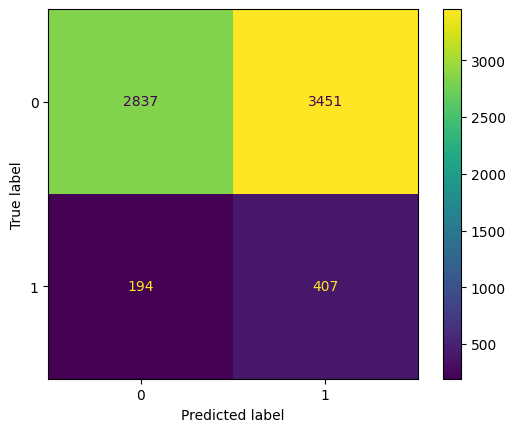

In [128]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

Com isso, temos um relatório das métricas. Note que, nos dados que representam situações semelhantes ao mundo real, que são desbalanceados e não foram utilizados na etapa de aprimoramento e comparação dos modelos, nós obtivemos um recall de 0.70. Agora, conseguimos identificar 494 clientes inadimplentes.

Essa etapa final de avaliação é crucial para compreender como nosso modelo se comportará com dados do mundo real. Por isso, foi importante separar os dados de teste desde o início do nosso projeto.

Utilizamos a estratégia de undersampling para aprimorar o resultado do nosso modelo, porém existem outras estratégias que podemos aplicar para melhorar seu desempenho.

Além disso, a empresa pode avaliar se o modelo construído será colocado em produção para identificar os clientes inadimplentes e evitar um prejuízo considerável.